In [1]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [2]:
ddir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/'

dir="//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/"
dddir = "C:/Users/Expedition/Desktop/expedition2024_summer/"

In [3]:

diag1 = ert.load(dir + '15Aug/k38_diag1_ws.tx0')
diag1e = ert.load(dir + '16Aug/k38_diag1e_hd_ws_remeasured.dat')
diag1e_shifted = ert.load(dir + '16Aug/k38_diag1e_hd_ws_shifted.dat')
edge = ert.load(dir + '17Aug/k38_edge_ws.dat')
veg = ert.load(dir + '17Aug/k38_veg_ws.dat')

diag1.save(dir + '15Aug/k38_diag1_ws.txt', "a b m n err rhoa")
diag1e.save(dir + '16Aug/k38_diag1e_hd_ws_remeasured.txt', "a b m n err rhoa")
diag1e_shifted.save(dir + '16Aug/k38_diag1e_hd_ws_shifted.txt', "a b m n err rhoa")
edge.save(dir + '17Aug/k38_edge_ws.txt', "a b m n err rhoa")
veg.save(dir + '17Aug/k38_veg_ws.txt', "a b m n err rhoa")


02/06/25 - 14:58:59 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
02/06/25 - 14:58:59 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
02/06/25 - 14:58:59 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
02/06/25 - 14:58:59 - pyGIMLi - INFO - No electrode positions found!
02/06/25 - 14:58:59 - pyGIMLi - INFO - imported:  Data: Electrodes: 48 data: 405
02/06/25 - 14:59:00 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
02/06/25 - 14:59:00 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
02/06/25 - 14:59:00 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
02/06/25 - 14:59:00 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


1

In [17]:
diag1 = ert.load(dir + '15Aug/k38_diag1_ws.txt')
diag1e = ert.load(dir + '16Aug/k38_diag1e_hd_ws_remeasured.txt')
diag1e_shifted = ert.load(dir + '16Aug/k38_diag1e_hd_ws_shifted.txt')
edge = ert.load(dir + '17Aug/k38_edge_ws_simple.txt')
diag1e_extended =  ert.load(dir + '16Aug/k38_diag1e_hd_ws_stitched.dat')
diag1_extended =  ert.load(dir + '16Aug/k38_diag1_hd_ws_stitched.dat')
data2024_long = ert.load(ddir + 'mehriban/JuliusKunz/Kamik_WS_200V_250cm_corrtopo.Dat')
#veg = ert.load(dir + '17Aug/k38_veg_ws.txt')
kamik = [diag1, diag1e, diag1e_shifted, edge, veg]

15/03/25 - 02:38:44 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
15/03/25 - 02:38:47 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
15/03/25 - 02:38:50 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


NameError: name 'veg' is not defined

In [18]:
diag1 = ert.load(dir + '15Aug/k38_diag1_ws.tx0')
diag1_topo = pd.read_csv(dir + '15Aug/k38_diag1_topo.txt', sep='\s+', header=None)


15/03/25 - 02:38:57 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
15/03/25 - 02:38:57 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
15/03/25 - 02:38:57 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
15/03/25 - 02:38:57 - pyGIMLi - INFO - No electrode positions found!
15/03/25 - 02:39:00 - pyGIMLi - INFO - imported:  Data: Electrodes: 48 data: 405


In [19]:
for i in range(diag1.sensorCount()):
    x_new = diag1_topo[0][i]  # Get x-value from diag1_topo[0]
    y_new = diag1_topo[1][i]  # Get y-value from diag1_topo[1]
    diag1.setSensorPosition(i, [x_new, y_new])  # Update electrode position

In [5]:
pg.y(diag1)

48 [17.515, 17.914, 18.428, 19.078, 19.395, 19.687, 20.004, 20.26, 20.289, 20.42, 20.384, 20.253, 20.258, 20.356, 20.38, 20.398, 20.42, 20.349, 20.353, 20.277, 20.174, 20.104, 20.077, 20.086, 20.134, 20.256, 20.279, 20.254, 20.195, 20.265, 20.314, 20.558, 20.593, 20.682, 20.606, 20.628, 20.621, 20.572, 20.566, 20.359, 20.101, 19.749, 19.429, 19.132, 19.025, 18.878, 18.952, 19.012]

In [20]:
diag1["k"] = ert.createGeometricFactors(diag1, numerical=True)
diag1['rhoa'] = diag1["u"] / diag1["i"] * diag1["k"]


15/03/25 - 02:39:23 - pyGIMLi - INFO - Cache c:\Users\Expedition\miniconda3\envs\pgdev\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (3.1s x 2): C:\Users\Expedition\AppData\Roaming\pygimli\Cache\36688682643490069


In [7]:
diag1

Data: Sensors: 48 data: 405, nonzero entries: ['a', 'b', 'err', 'i', 'ip', 'iperr', 'k', 'm', 'n', 'rhoa', 'u', 'valid']

15/03/25 - 02:39:44 - pyGIMLi - INFO - Cache c:\Users\Expedition\miniconda3\envs\pgdev\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 1): C:\Users\Expedition\AppData\Roaming\pygimli\Cache\2170470022447410865


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x24062784e10>)

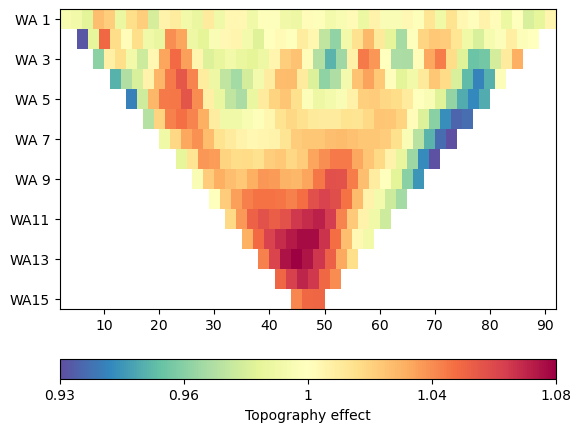

In [21]:
k0 = ert.createGeometricFactors(diag1, numerical=False)
ert.showData(diag1, vals=k0/diag1['k'], label='Topography effect')

In [22]:
diag1['err'] = diag1['iperr'] 

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x240372b9c50>)

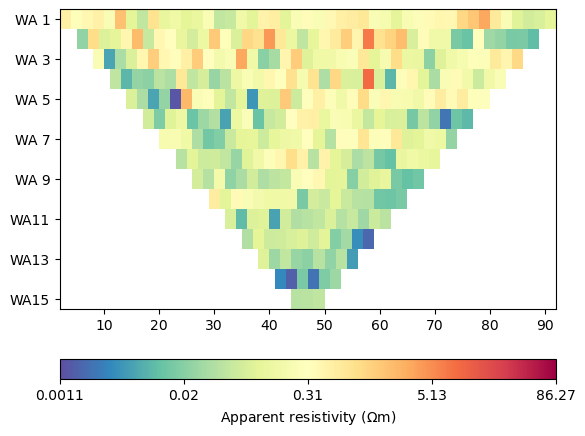

In [23]:
ert.show(diag1, diag1['err'])

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x265c61e14d0>)

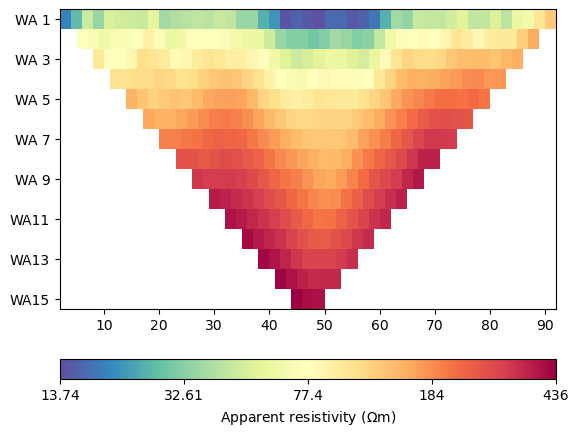

In [11]:
ert.show(diag1)

In [11]:
diag1.markInvalid(diag1['err']>=4)

15/03/25 - 02:40:19 - pyGIMLi - INFO - Found 2 regions.
15/03/25 - 02:40:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/03/25 - 02:40:19 - pyGIMLi - INFO - Found 2 regions.
15/03/25 - 02:40:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/03/25 - 02:40:19 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/03/25 - 02:40:19 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/03/25 - 02:40:20 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3524 Cells: 6692 Boundaries: 5196
15/03/25 - 02:40:20 - pyGIMLi - INFO - Use median(data values)=126.38100060651709
15/03/25 - 02:40:20 - pyGIMLi - INFO - Created startmodel from forward operator:1290, min/max=126.381001/126.381001
15/03/25 - 02:40:20 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000024062460E00>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 13.74/436
min/max (error): 0.11%/8627%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 6512.36
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  605.22 (dPhi = 90.66%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  445.11 (dPhi = 26.45%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   53.50 (dPhi = 87.47%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.40 (dPhi = 91.20%) lam: 10.0
-------------------------------------------------

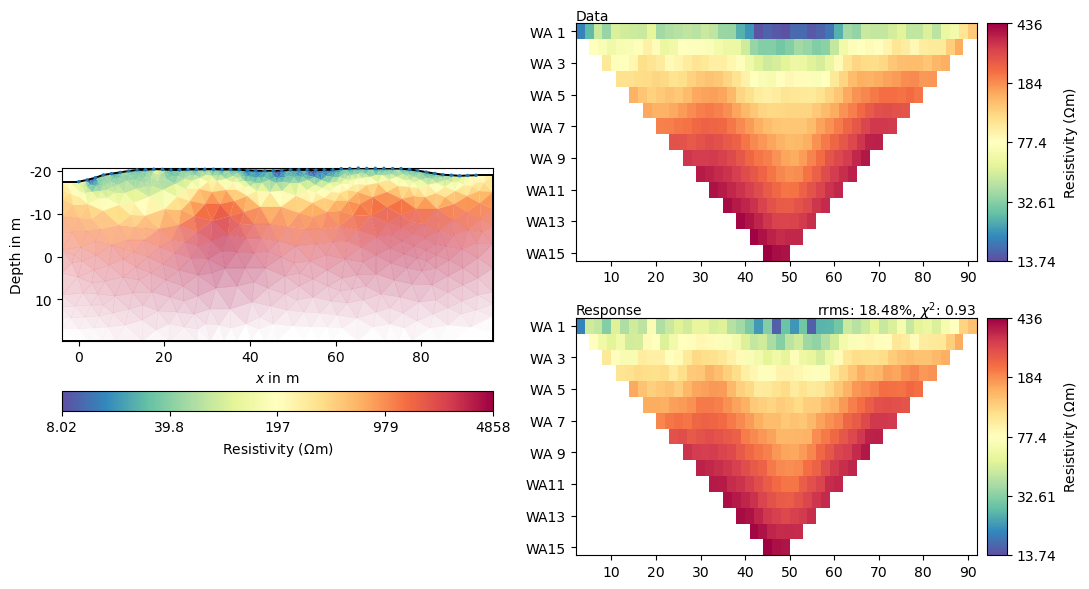

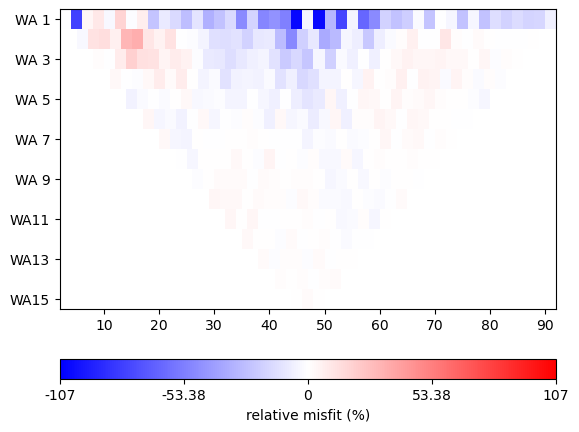

In [24]:
mgr = ert.ERTManager(diag1)
mgr.invert(diag1, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=10, paraMaxCellSize=10)
mgr.showResultAndFit()
mgr.showMisfit()

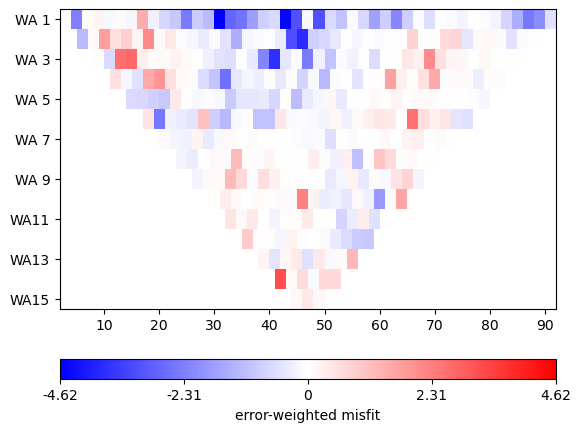

In [25]:
mgr.showMisfit(errorWeighted=True)

26/02/25 - 17:29:24 - pyGIMLi - INFO - Found 2 regions.
26/02/25 - 17:29:24 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
26/02/25 - 17:29:25 - pyGIMLi - INFO - Found 2 regions.
26/02/25 - 17:29:25 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
26/02/25 - 17:29:25 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/02/25 - 17:29:25 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
26/02/25 - 17:29:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 15955 Cells: 31544 Boundaries: 23840
26/02/25 - 17:29:26 - pyGIMLi - INFO - Use median(data values)=126.38100060651894
26/02/25 - 17:29:26 - pyGIMLi - INFO - Created startmodel from forward operator:6801, min/max=126.381001/126.381001
26/02/25 - 17:29:26 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002589E6BBA60>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 13.74/436
min/max (error): 0.11%/8627%
min/max (start model): 126/126
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 6512.81
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  502.92 (dPhi = 92.21%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  334.54 (dPhi = 33.28%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    8.88 (dPhi = 96.03%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.20 (dPhi = 43.81%) lam: 20.0
-------------------------------------------------

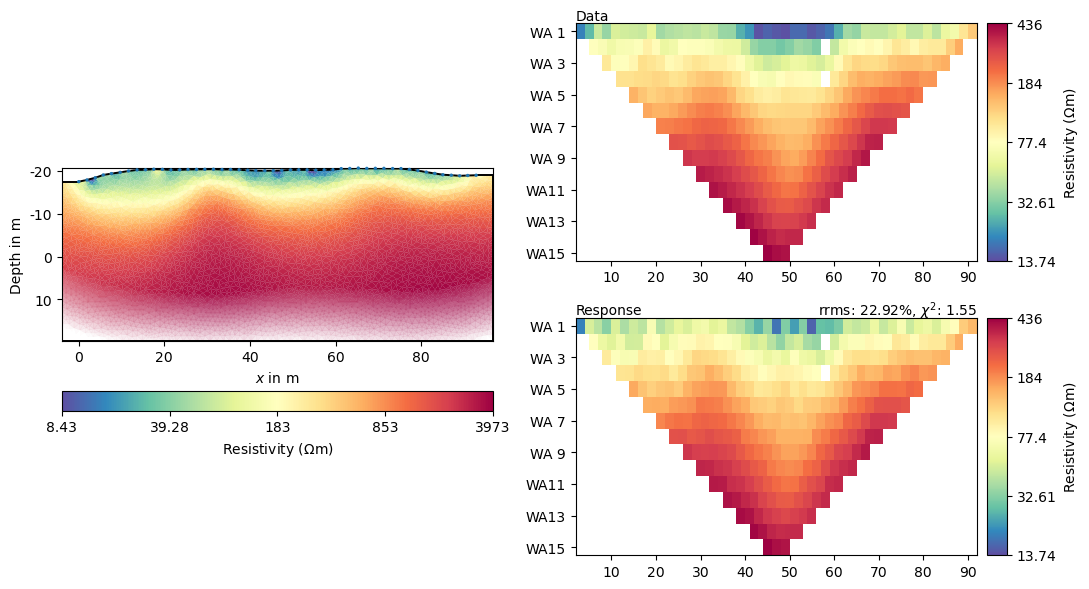

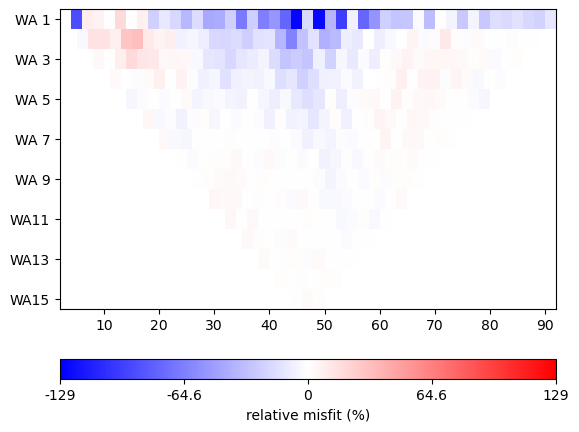

In [ ]:
mgr = ert.ERTManager(diag1)
mgr.invert(diag1, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=10, paraMaxCellSize=1)
mgr.showResultAndFit()
mgr.showMisfit()

15/03/25 - 02:41:22 - pyGIMLi - INFO - Saving inversion results to: C:/Users/Expedition/Desktop/expedition2024_summer/all_inversions/kamik_diag1_summer\ERTManager


Path C:/Users/Expedition/Desktop/expedition2024_summer/all_inversions/kamik_diag1_summer\ERTManager already exists. Skipping


('C:/Users/Expedition/Desktop/expedition2024_summer/all_inversions/kamik_diag1_summer\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

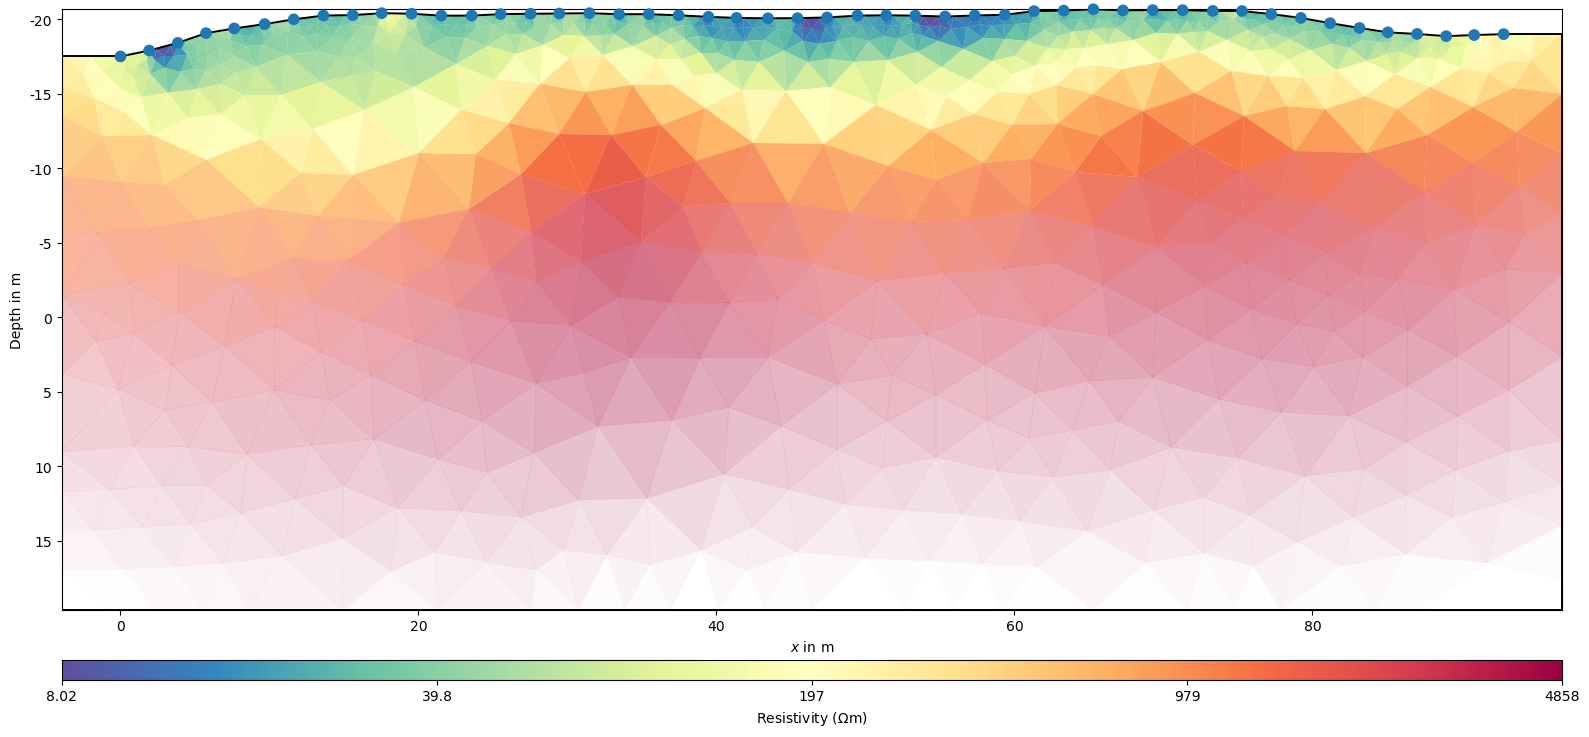

In [26]:
mgr.saveResult(dddir+ 'all_inversions/kamik_diag1_summer')

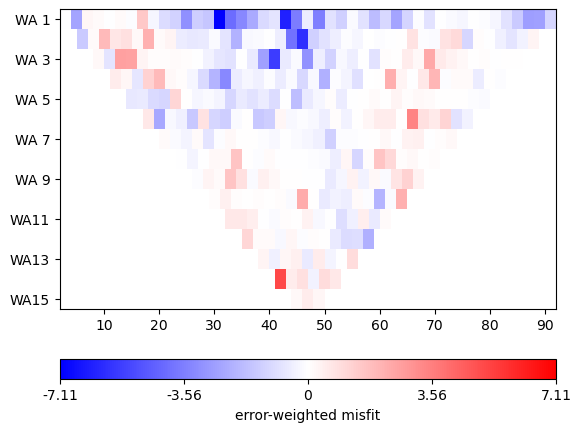

In [68]:
mgr.showMisfit(errorWeighted=True)

In [249]:
def geom_error(data):
    # Set sensor positions
    #data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
    data.remove(data['rhoa'] < 0)
    data['k'] = ert.createGeometricFactors(data, numerical=True)
    mgr = ert.ERTManager(sr=False)
    k0 = ert.createGeometricFactors(data)
    ert.showData(data, vals=k0/data['k'], label='Topography effect')
    data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
    #data.remove(data['err'] > 0.06)
    ert.show(data, data['err'])


    return data, mgr, k0

27/09/24 - 11:29:39 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (5.4s x 6): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\6696563257227984394
27/09/24 - 11:29:39 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 6): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\3867017887746514051
27/09/24 - 11:29:40 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (5.0s x 6): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\8954824101295297128
27/09/24 - 11:29:40 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 6): C:\Users\mealiy001\AppData\Roaming\py

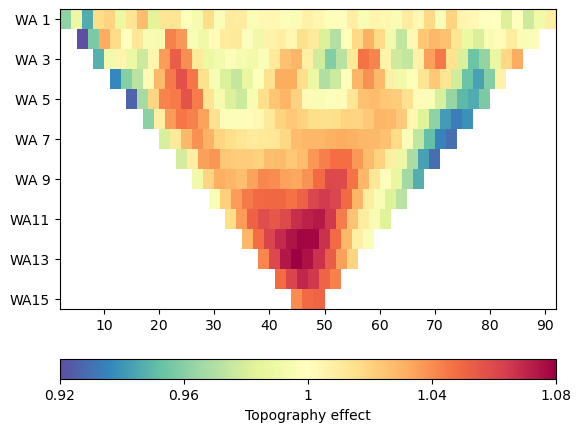

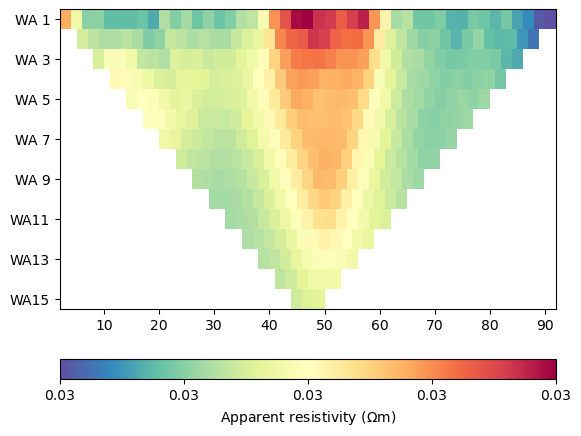

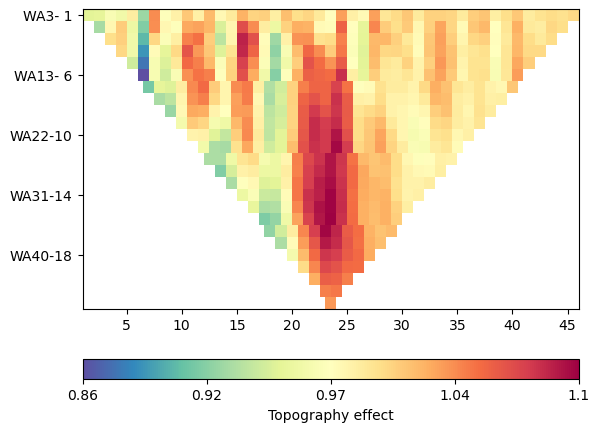

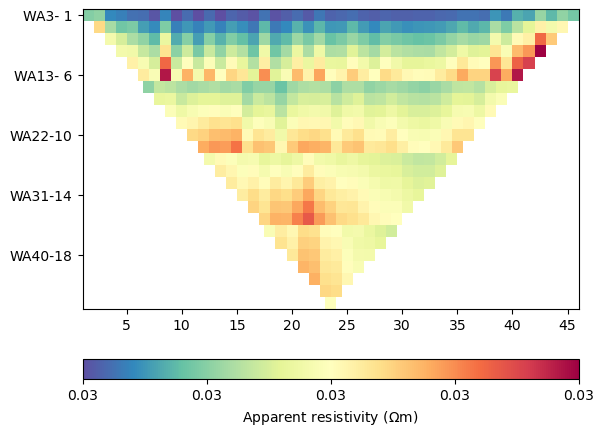

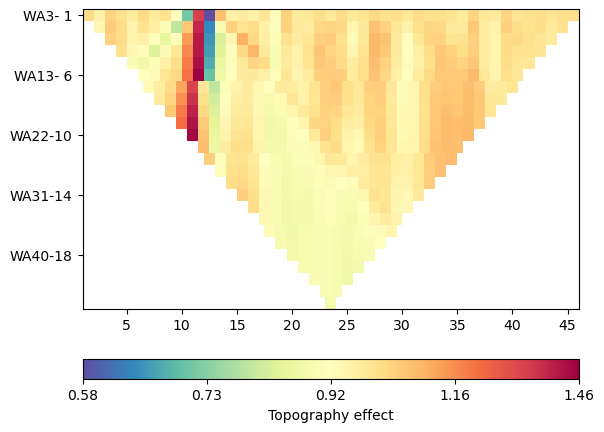

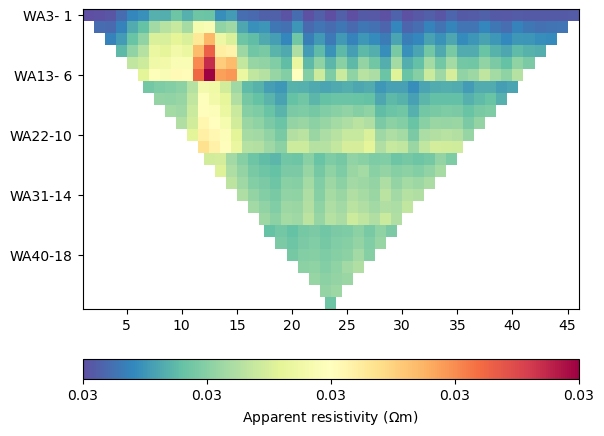

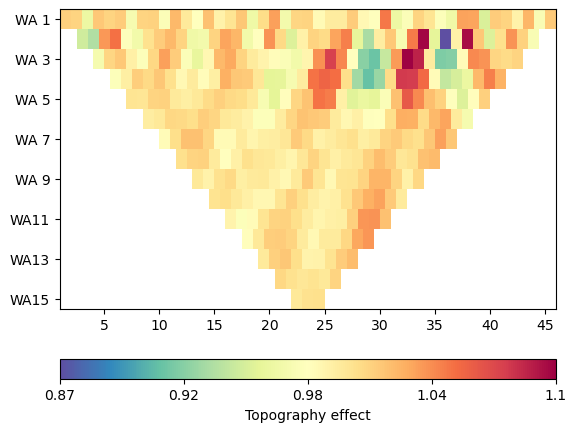

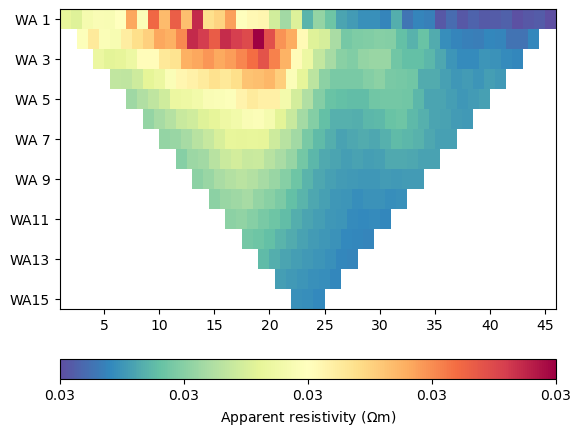

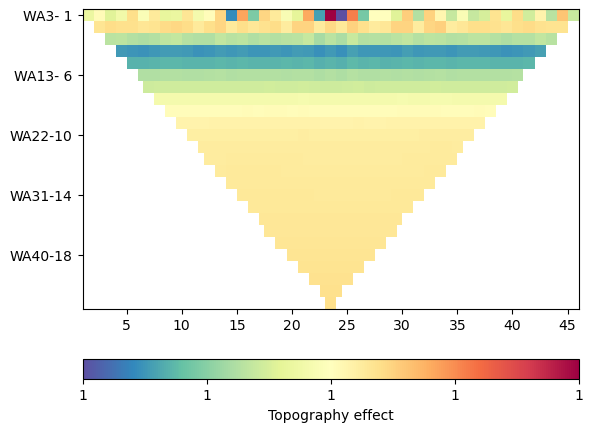

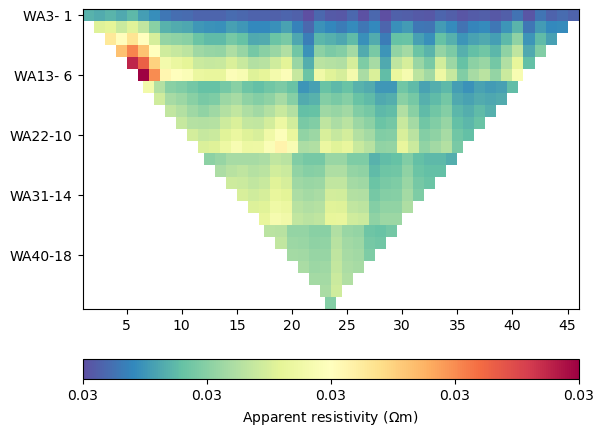

In [250]:
for item in kamik:
 geom_error(item)

24/09/24 - 10:49:02 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
24/09/24 - 10:49:12 - pyGIMLi - INFO - Save RVector binary
24/09/24 - 10:49:12 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\4791388174668163011
24/09/24 - 10:49:12 - pyGIMLi - INFO - Save RVector binary
24/09/24 - 10:49:12 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\4067208899898743650


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x18f191e7250>)

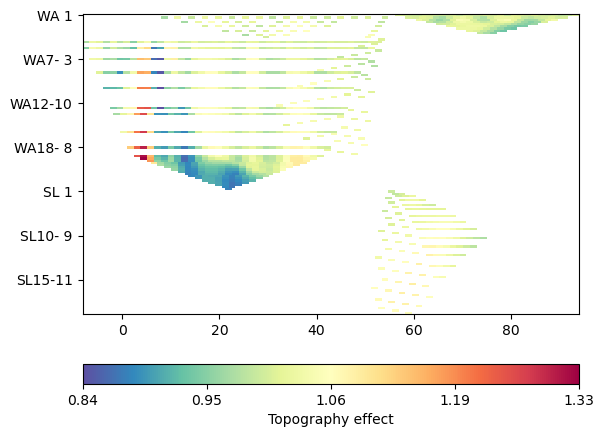

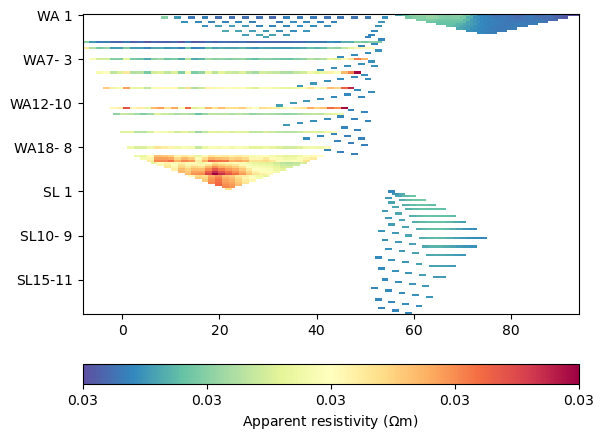

In [101]:
diag1_extended.remove(diag1_extended['rhoa'] < 0)
diag1_extended['k'] = ert.createGeometricFactors(diag1_extended, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(diag1_extended)
ert.showData(diag1_extended, vals=k0/diag1_extended['k'], label='Topography effect')
diag1_extended['err'] = ert.estimateError(diag1_extended, relativeError=0.03, absoluteUError=5e-5)
#data.remove(data['err'] > 0.06)
ert.show(diag1_extended, diag1_extended['err'])

24/09/24 - 14:10:23 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
24/09/24 - 14:10:26 - pyGIMLi - INFO - Save RVector binary
24/09/24 - 14:10:26 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\5740098414694143144
24/09/24 - 14:10:26 - pyGIMLi - INFO - Save RVector binary
24/09/24 - 14:10:26 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\8922219220176053173


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x18f8db86bd0>)

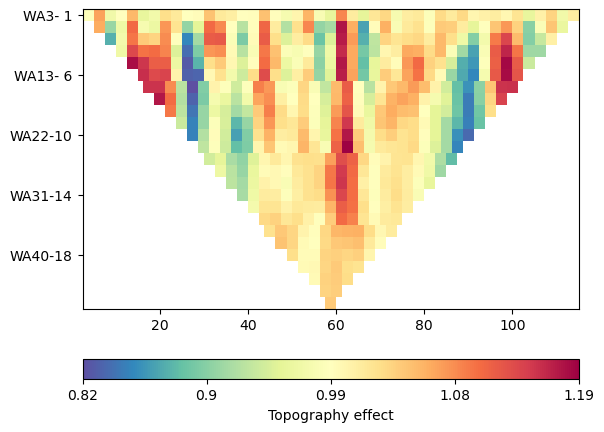

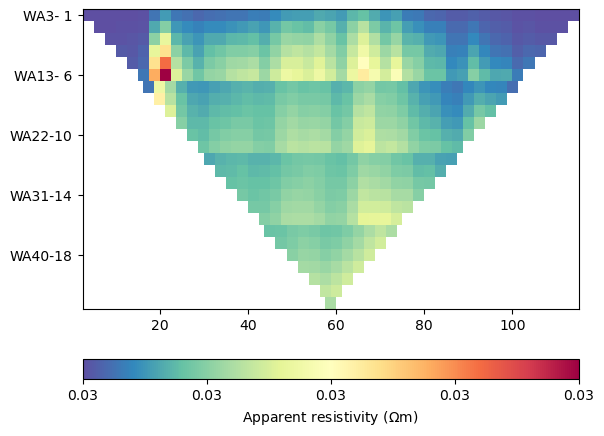

In [199]:
data2024_long.remove(data2024_long['rhoa'] < 0)
data2024_long.setSensorPositions(pg.meshtools.interpolateAlongCurve(data2024_long.additionalPoints(), pg.x(data2024_long)))
data2024_long['k'] = ert.createGeometricFactors(data2024_long, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data2024_long)
ert.showData(data2024_long, vals=k0/data2024_long['k'], label='Topography effect')
data2024_long['err'] = ert.estimateError(data2024_long, relativeError=0.03, absoluteUError=5e-5)
#data.remove(data['err'] > 0.06)
ert.show(data2024_long, data2024_long['err'])

Flipping profiles

In [39]:
def flip_profile(data):
    """
    Flip the x-coordinates of the sensors and mirror the electrode configuration.
    """
    # Get the original sensor positions
    sensors = [data.sensorPosition(i) for i in range(data.sensorCount())]
    
    # Get the number of sensors
    n_sensors = len(sensors)
    
    # Flip the x-coordinates of the sensor positions
    for i, sensor in enumerate(sensors):
        flipped_position = pg.RVector3(-sensor.x(), sensor.y(), sensor.z())
        data.setSensorPosition(i, flipped_position)
    
    # Reverse the electrode configuration to match the flipped sensor positions
    data['a'] = n_sensors - 1 - data['a']
    data['b'] = n_sensors - 1 - data['b']
    data['m'] = n_sensors - 1 - data['m']
    data['n'] = n_sensors - 1 - data['n']

    return data

# Example of usage:
data = ert.load(dir + '16Aug/k38_old_125cm.dat')  # Load this year's ERT data

# Flip the profile to match last year's direction
old2024august = flip_profile(data)
kamik = [old2024august]
# Save the flipped data if needed
old2024august.save(dir + '16Aug/k38_old_125cm_flipped.dat')

17/09/24 - 13:33:12 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


1

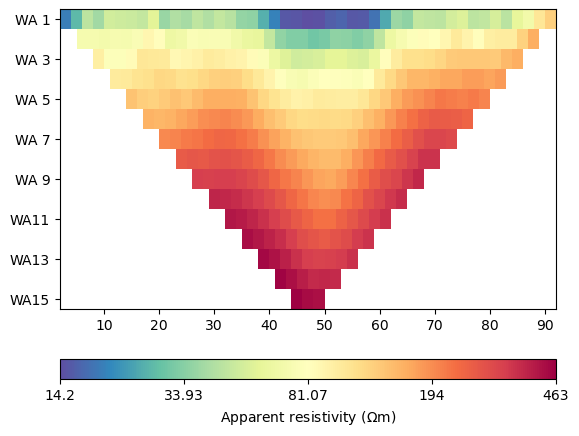

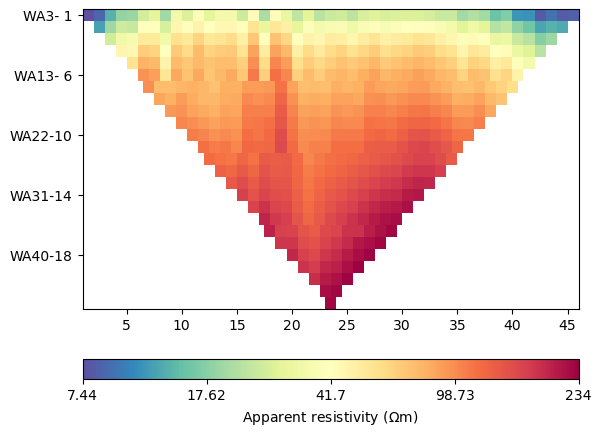

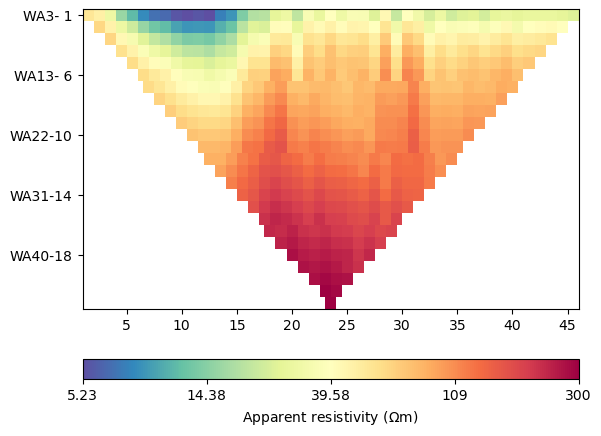

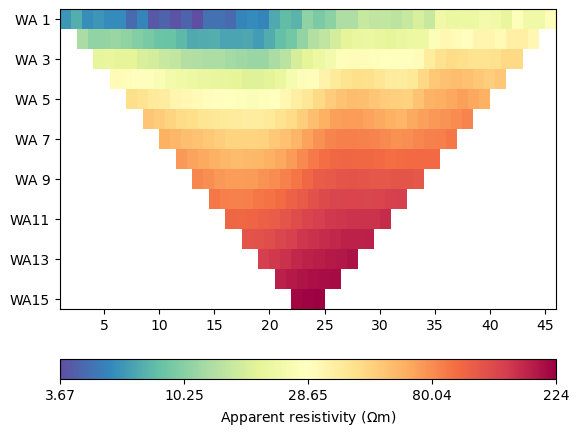

In [52]:
for item in kamik:
    ert.showData(item)

23/09/24 - 14:39:13 - pyGIMLi - INFO - Found 2 regions.
23/09/24 - 14:39:13 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/09/24 - 14:39:13 - pyGIMLi - INFO - Found 2 regions.
23/09/24 - 14:39:13 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/09/24 - 14:39:13 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/09/24 - 14:39:13 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/09/24 - 14:39:13 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2453 Cells: 4544 Boundaries: 3588
23/09/24 - 14:39:13 - pyGIMLi - INFO - Use median(data values)=127.128
23/09/24 - 14:39:13 - pyGIMLi - INFO - Created startmodel from forward operator: 901, min/max=127.128000/127.128000
23/09/24 - 14:39:13 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000018EEC67CAE0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000018F0B035FD0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000018F0BBBC890>
min/max (data): 14.2/463
min/max (error): 3%/3.04%
min/max (start model): 127/127
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  820.83
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  121.22 (dPhi = 84.96%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   79.94 (dPhi = 33.28%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    5.33 (dPhi = 88.49%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    4.23 (dPhi = 16.32%) lam: 20

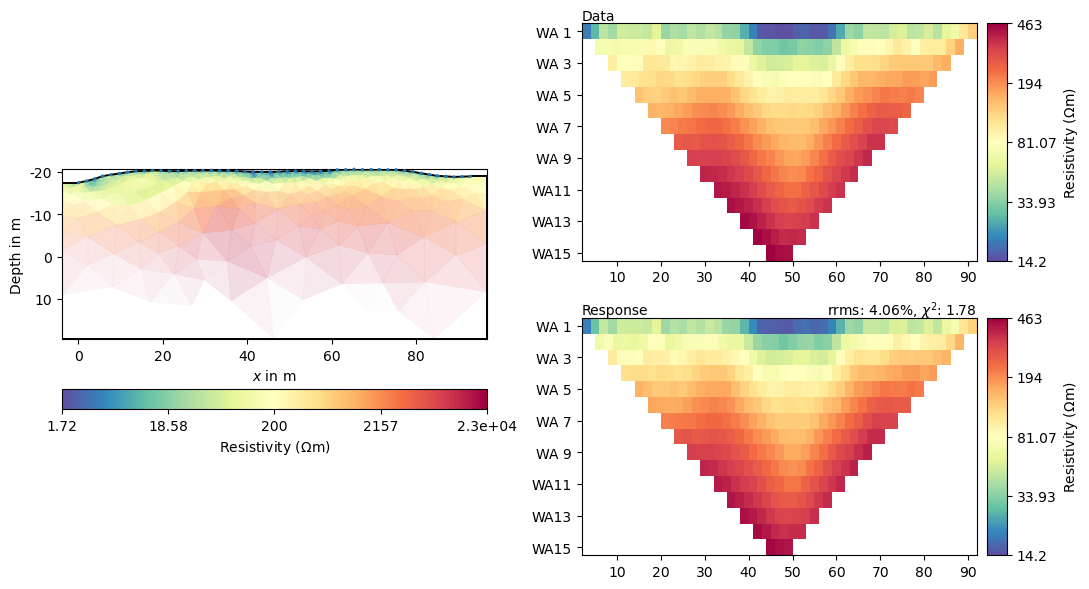

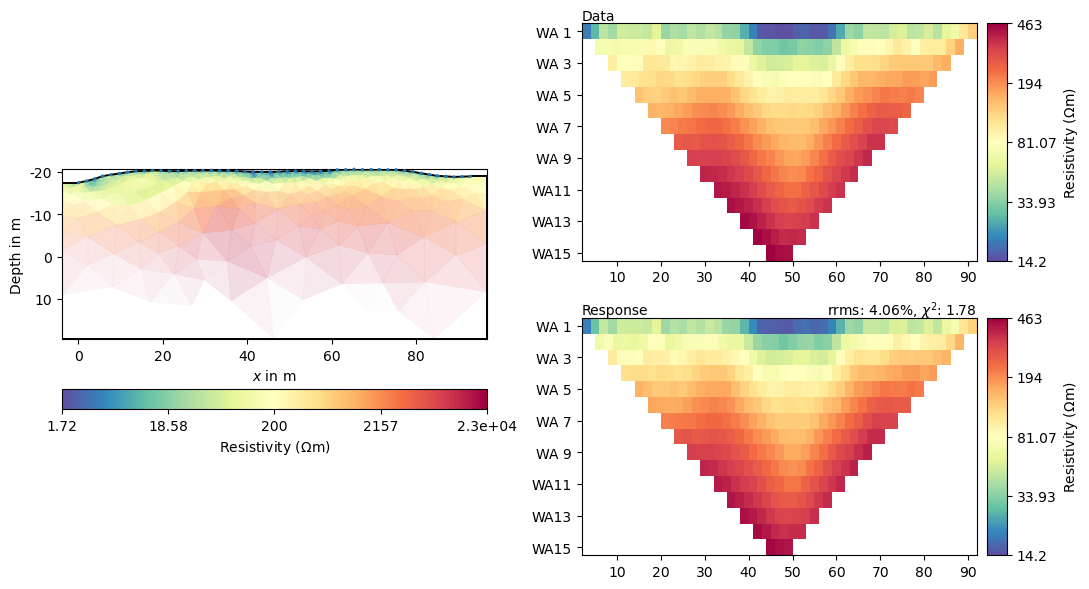

In [53]:
mgr = ert.ERTManager(kamik[0])
mgr.invert(kamik[0], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

23/09/24 - 14:39:46 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_diag1\ERTManager


Path //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_diag1\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_diag1\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

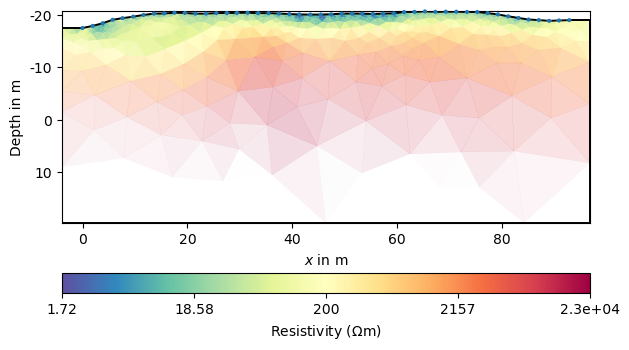

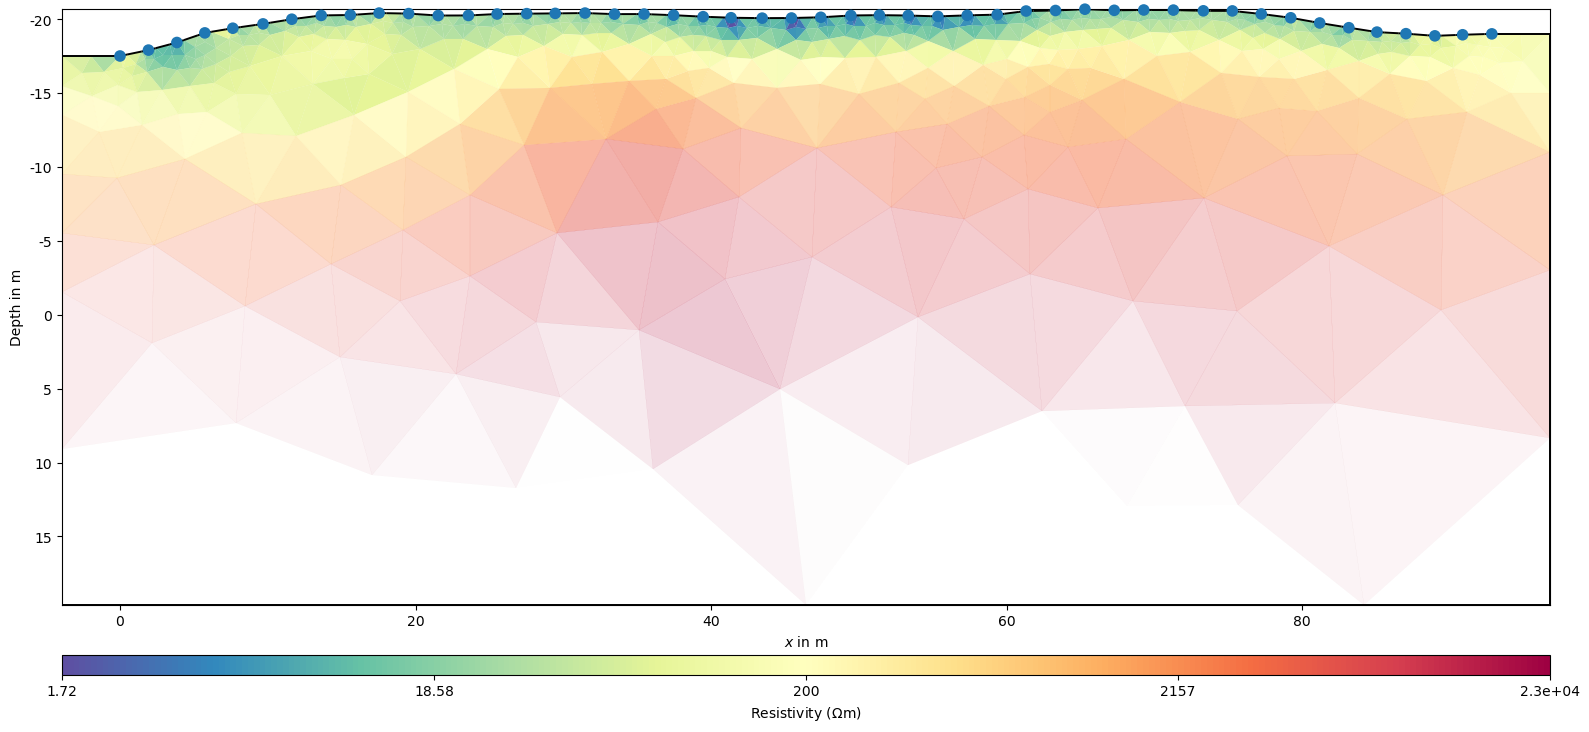

In [54]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/kamik_diag1')

23/09/24 - 14:39:56 - pyGIMLi - INFO - Found 2 regions.
23/09/24 - 14:39:56 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/09/24 - 14:39:56 - pyGIMLi - INFO - Found 2 regions.
23/09/24 - 14:39:56 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/09/24 - 14:39:56 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/09/24 - 14:39:56 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/09/24 - 14:39:56 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2217 Cells: 4080 Boundaries: 3236
23/09/24 - 14:39:56 - pyGIMLi - INFO - Use median(data values)=88.44
23/09/24 - 14:39:56 - pyGIMLi - INFO - Created startmodel from forward operator: 829, min/max=88.440000/88.440000
23/09/24 - 14:39:56 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000018F0BBEF6A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000018F04C0E340>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000018F0535BDF0>
min/max (data): 7.44/234
min/max (error): 3.01%/3.14%
min/max (start model): 88.44/88.44
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  489.85
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   52.93 (dPhi = 88.99%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    7.60 (dPhi = 83.46%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    0.73 (dPhi = 76.25%) lam: 20.0


################################################################################
#                  Abort criterion reached: 

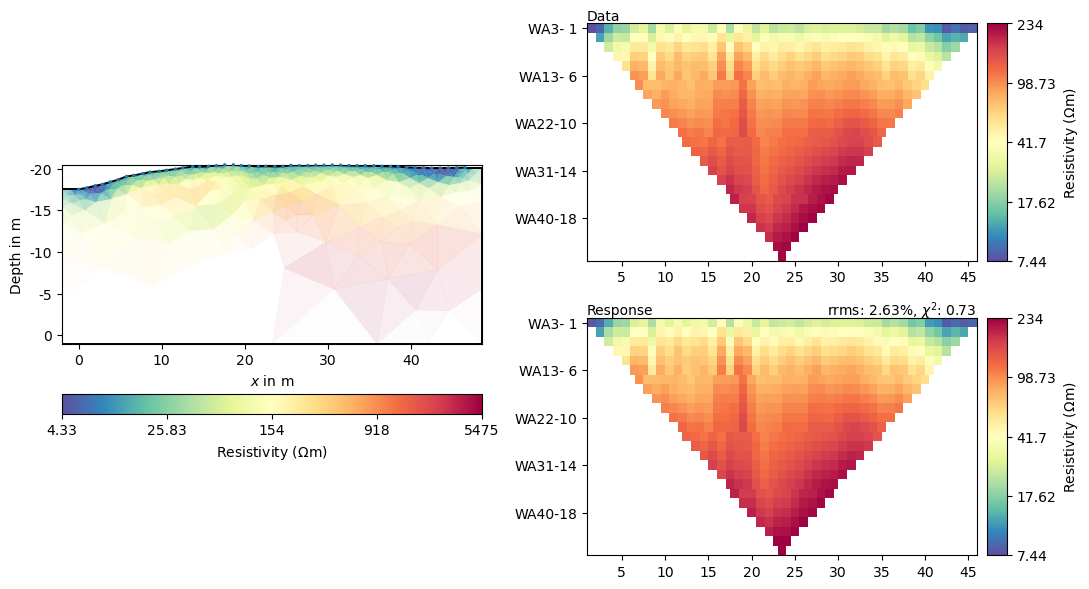

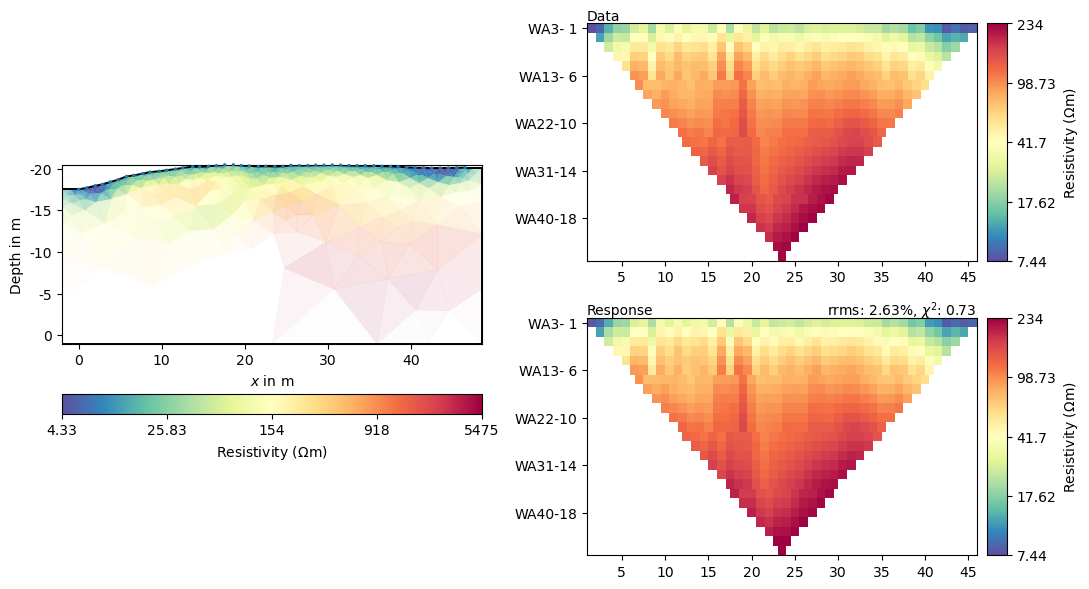

In [55]:
mgr = ert.ERTManager(kamik[1])
mgr.invert(kamik[1], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

23/09/24 - 14:40:17 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_diag1e\ERTManager


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_diag1e\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

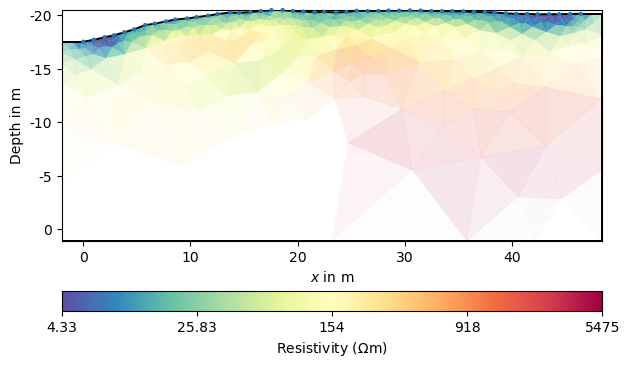

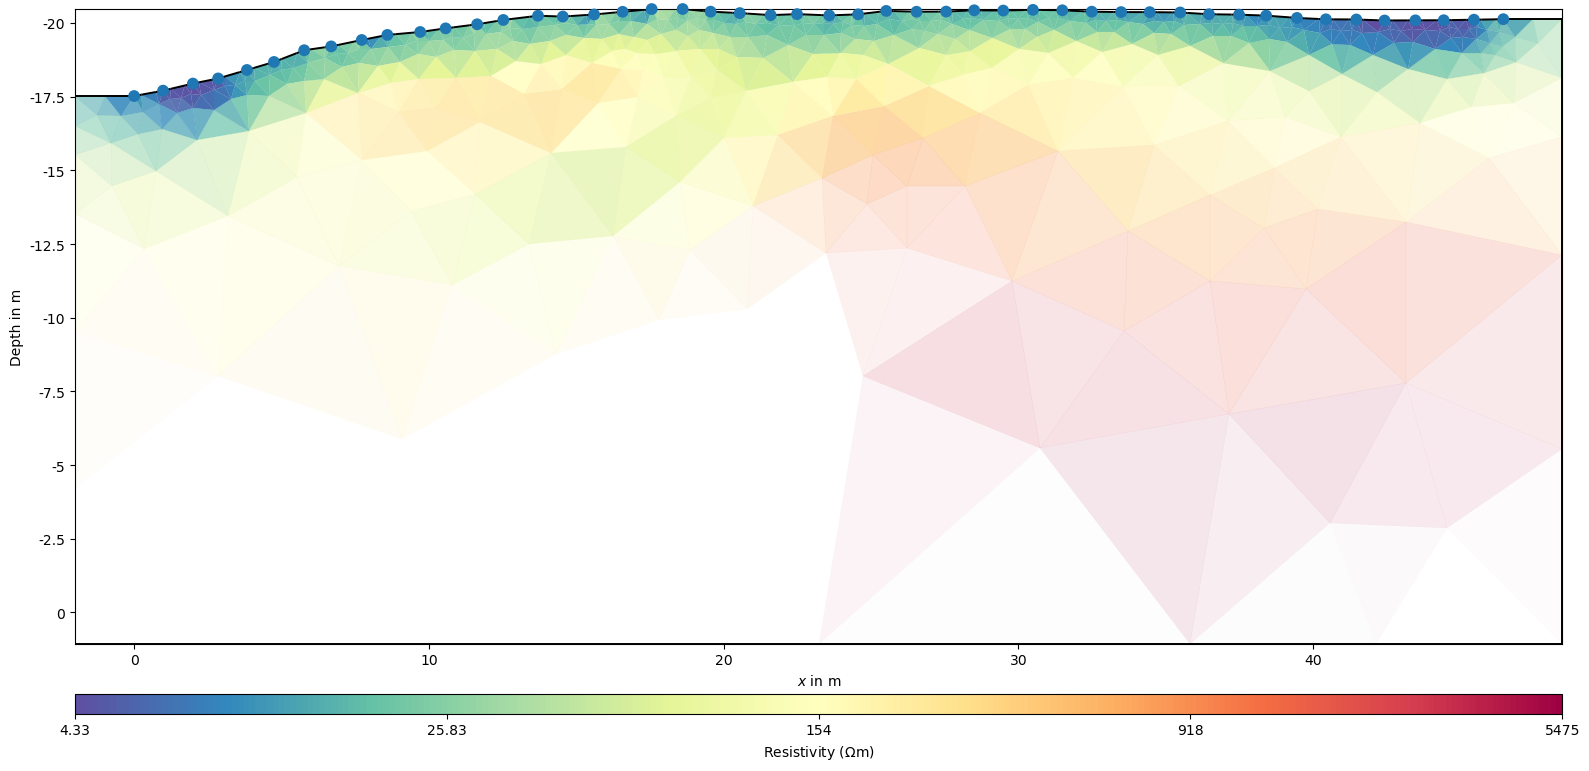

In [56]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/kamik_diag1e')

23/09/24 - 14:40:25 - pyGIMLi - INFO - Found 2 regions.
23/09/24 - 14:40:25 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/09/24 - 14:40:25 - pyGIMLi - INFO - Found 2 regions.
23/09/24 - 14:40:25 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/09/24 - 14:40:25 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/09/24 - 14:40:25 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/09/24 - 14:40:25 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2382 Cells: 4396 Boundaries: 3480
23/09/24 - 14:40:26 - pyGIMLi - INFO - Use median(data values)=82.221
23/09/24 - 14:40:26 - pyGIMLi - INFO - Created startmodel from forward operator: 825, min/max=82.221000/82.221000
23/09/24 - 14:40:26 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000018F066347C0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000018F069051C0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000018F0713FF40>
min/max (data): 5.23/300
min/max (error): 3.01%/3.27%
min/max (start model): 82.22/82.22
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  645.25
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   61.51 (dPhi = 90.30%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   28.28 (dPhi = 51.67%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   11.65 (dPhi = 53.44%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    4.21 (dPhi = 52.65%) 

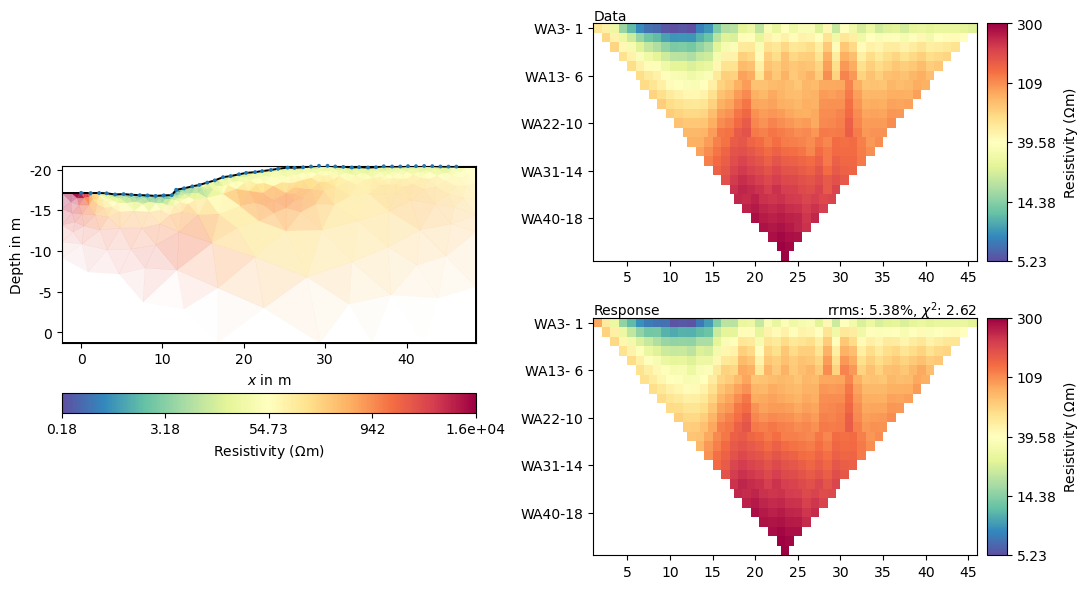

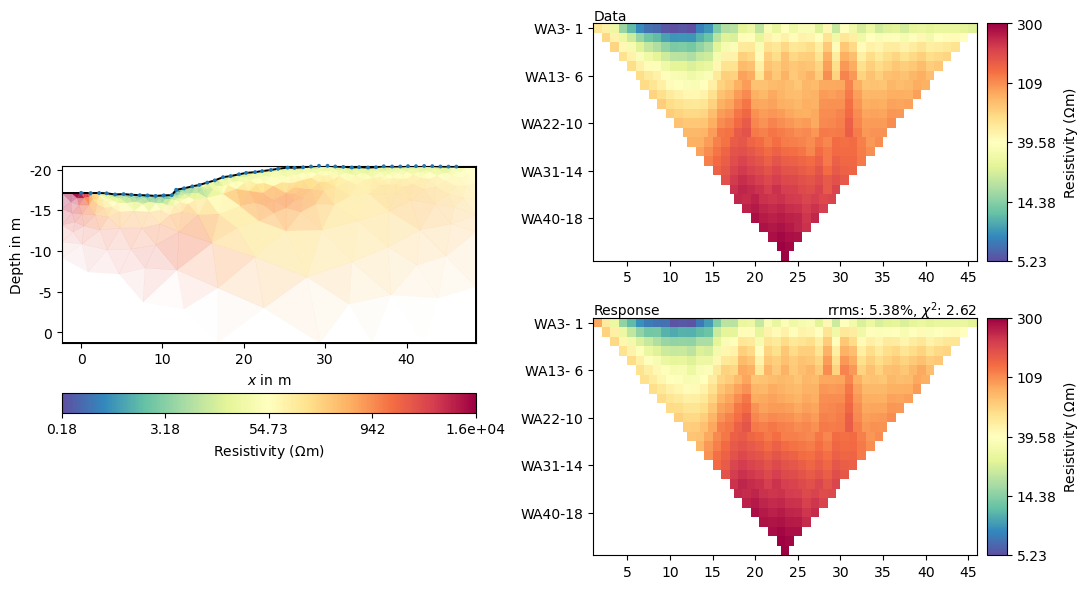

In [57]:
mgr = ert.ERTManager(kamik[2])
mgr.invert(kamik[2], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

23/09/24 - 14:41:16 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_diag1e_shifted\ERTManager


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_diag1e_shifted\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

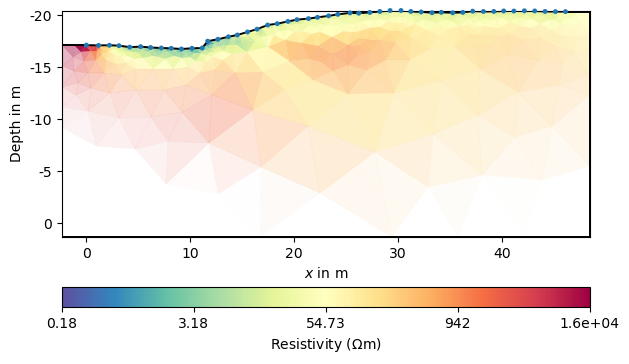

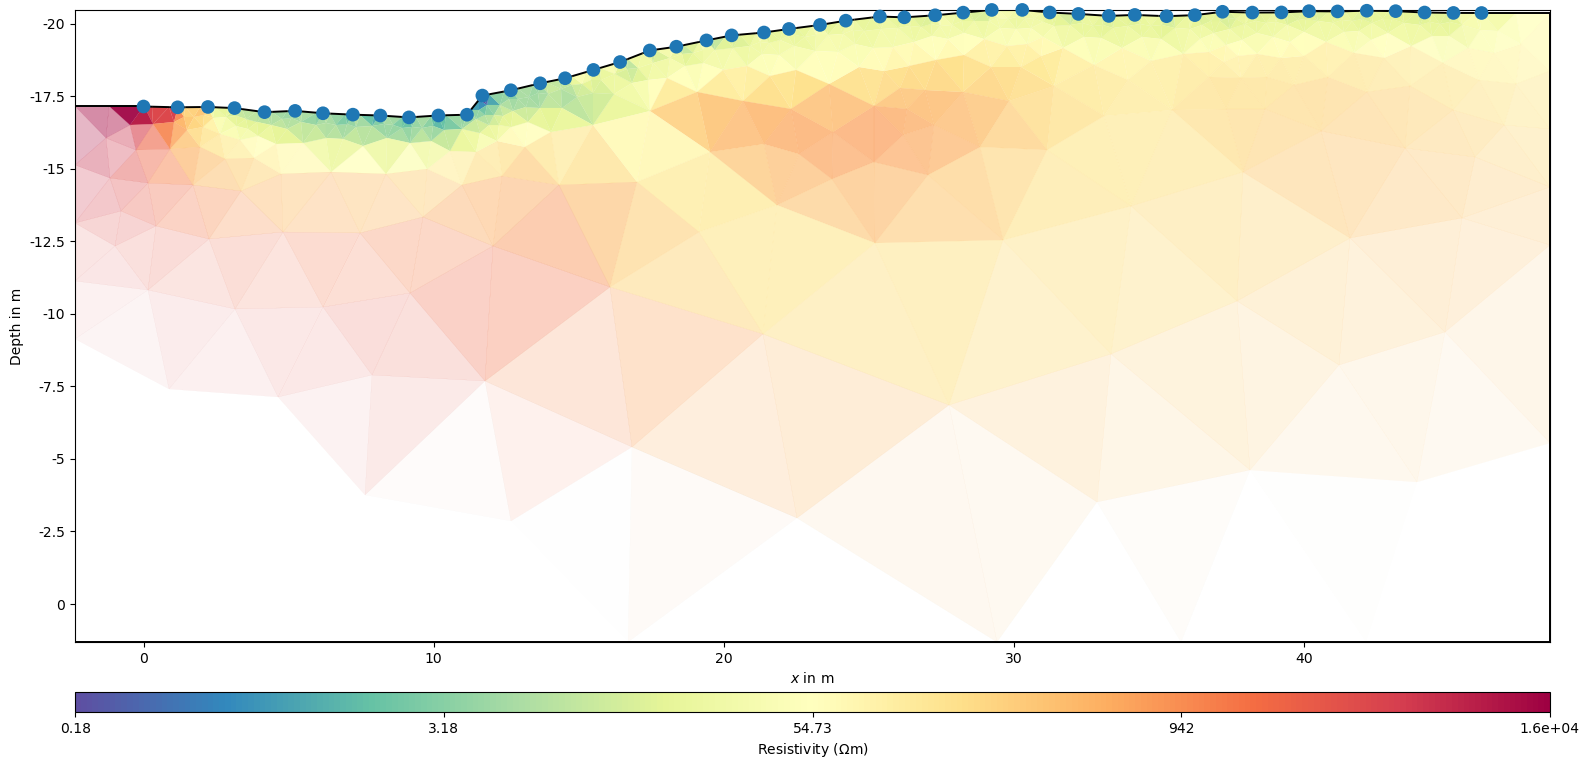

In [58]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/kamik_diag1e_shifted')

23/09/24 - 14:43:29 - pyGIMLi - INFO - Found 2 regions.


23/09/24 - 14:43:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/09/24 - 14:43:29 - pyGIMLi - INFO - Found 2 regions.
23/09/24 - 14:43:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/09/24 - 14:43:29 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/09/24 - 14:43:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/09/24 - 14:43:29 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2346 Cells: 4332 Boundaries: 3428
23/09/24 - 14:43:30 - pyGIMLi - INFO - Use median(data values)=32.007
23/09/24 - 14:43:30 - pyGIMLi - INFO - Created startmodel from forward operator: 863, min/max=32.007000/32.007000
23/09/24 - 14:43:30 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000018F0D725350>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000018F0749F9C0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000018F069AAD90>
min/max (data): 3.67/224
min/max (error): 3.01%/3.1%
min/max (start model): 32.01/32.01
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1192.18
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  194.63 (dPhi = 83.27%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  104.70 (dPhi = 40.08%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   51.72 (dPhi = 49.30%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   46.44 (dPhi = 8.01%) lam: 20.0
-----------

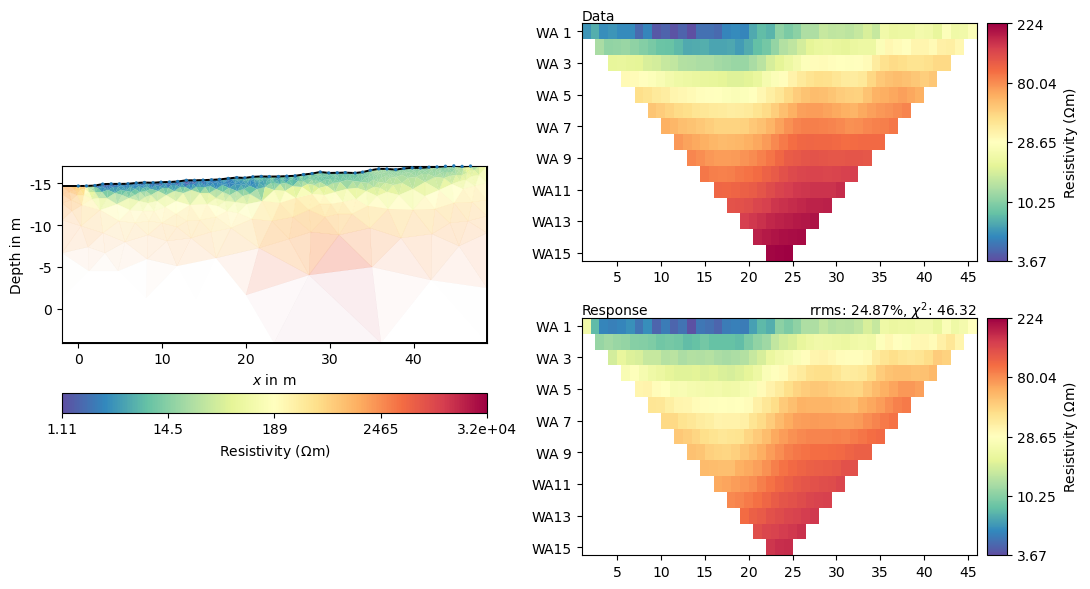

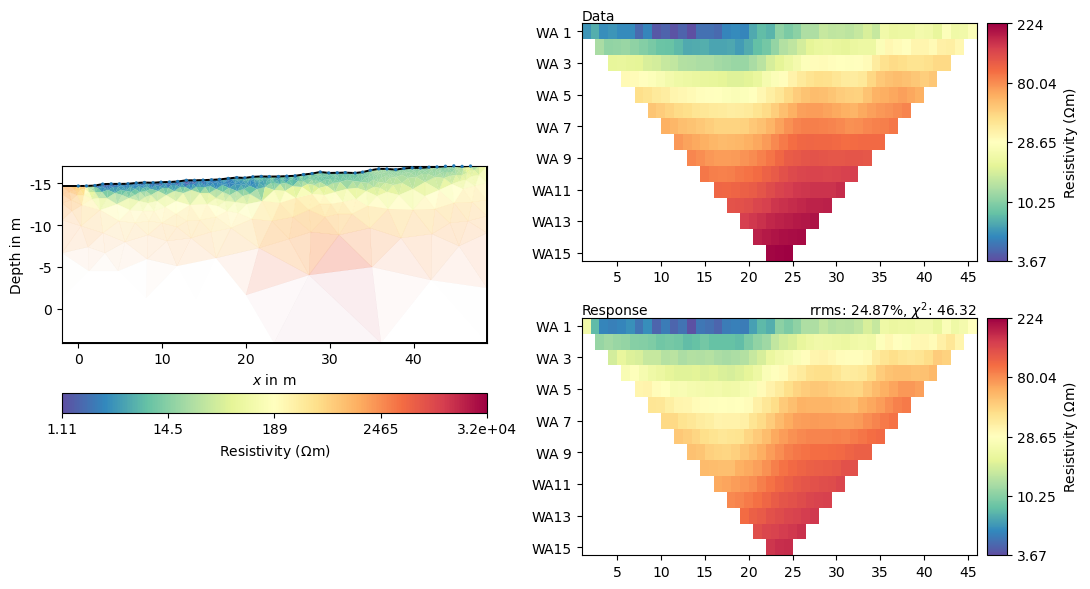

In [59]:
mgr = ert.ERTManager(kamik[3])
mgr.invert(kamik[3], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)
mgr.showResultAndFit()

23/09/24 - 14:43:56 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_edge\ERTManager


Path //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_edge\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_edge\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

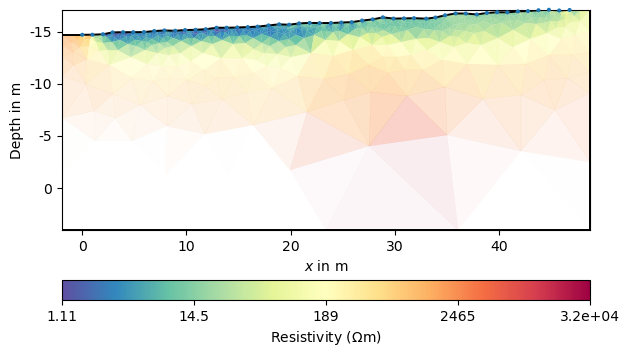

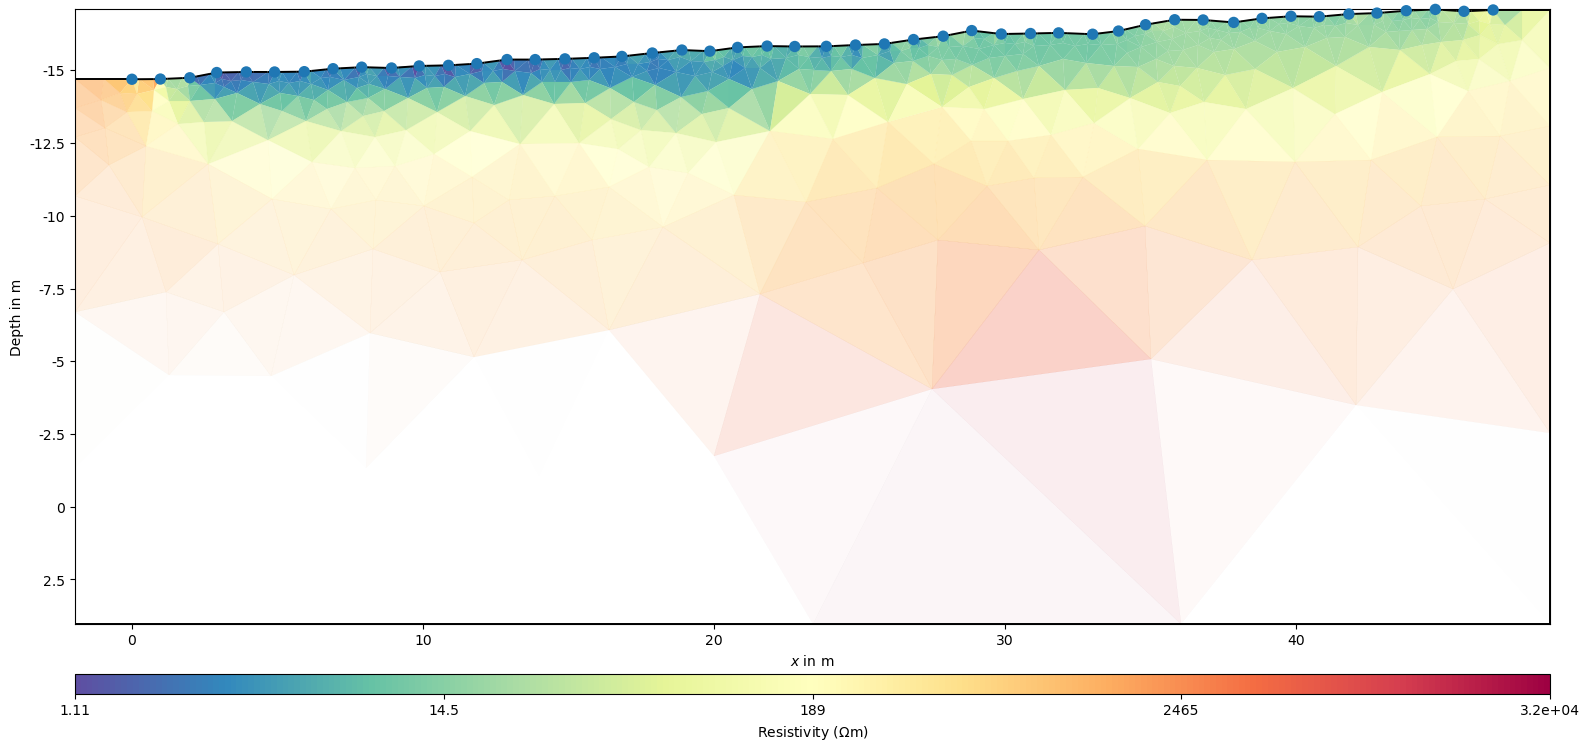

In [60]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/kamik_edge')

24/09/24 - 09:33:07 - pyGIMLi - INFO - Found 2 regions.
24/09/24 - 09:33:07 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/09/24 - 09:33:07 - pyGIMLi - INFO - Found 2 regions.
24/09/24 - 09:33:07 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/09/24 - 09:33:07 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/09/24 - 09:33:07 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/09/24 - 09:33:07 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2913 Cells: 5408 Boundaries: 4264
24/09/24 - 09:33:08 - pyGIMLi - INFO - Use median(data values)=96.22325000000001
24/09/24 - 09:33:08 - pyGIMLi - INFO - Created startmodel from forward operator: 1106, min/max=96.223250/96.223250
24/09/24 - 09:33:08 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000018F1A373470>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000018F19EA1490>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000018F1A4E04A0>
min/max (data): 8.06/234
min/max (error): 3.01%/3.14%
min/max (start model): 96.22/96.22
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  476.97
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   64.18 (dPhi = 86.36%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   15.49 (dPhi = 73.69%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    4.03 (dPhi = 66.66%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.92 (dPhi = 2.40%) l

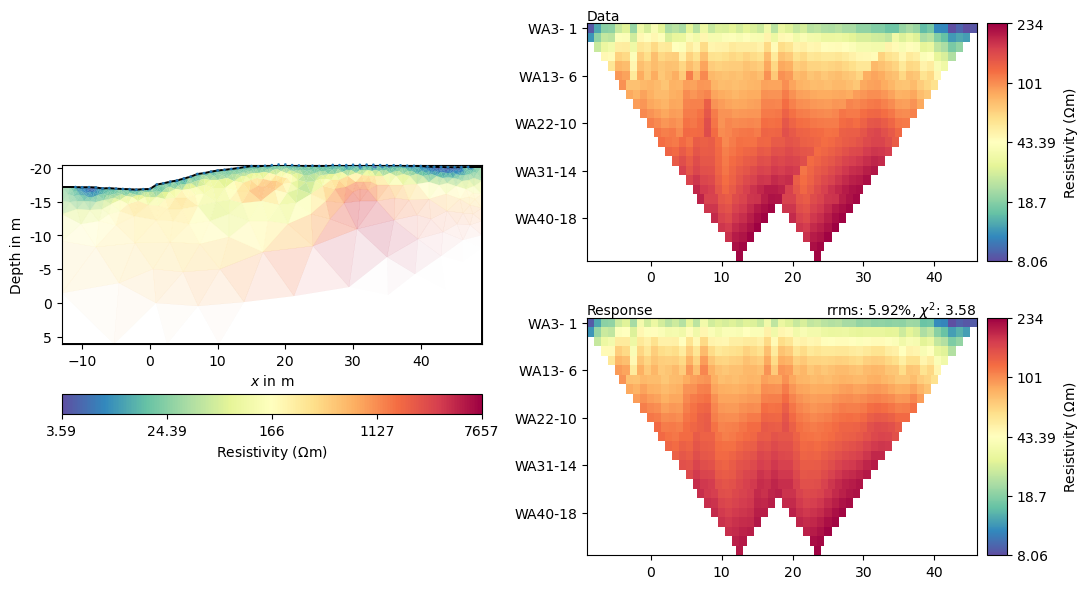

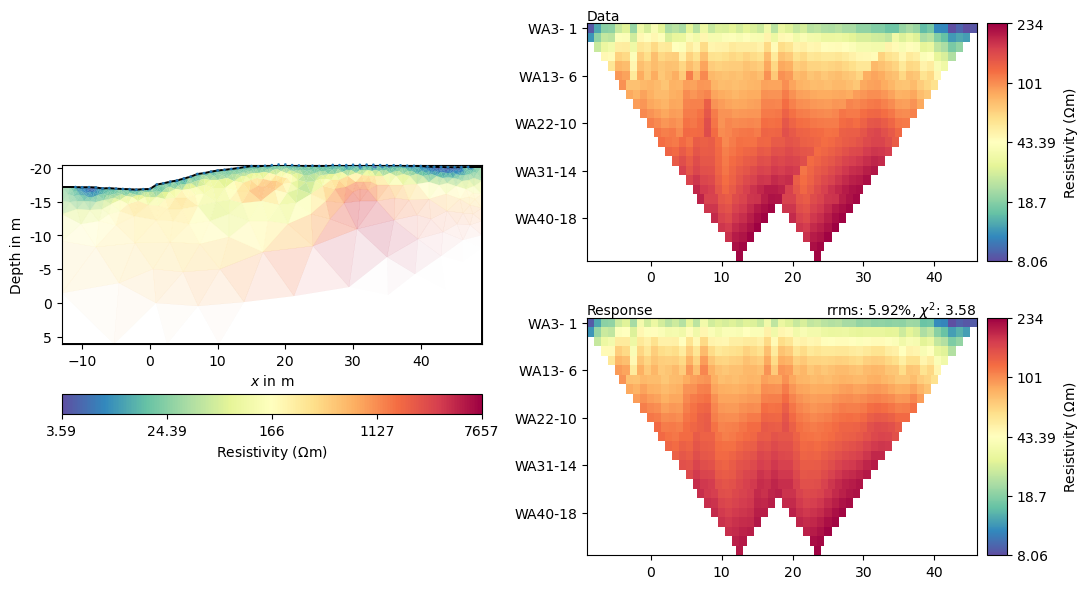

In [78]:
mgr = ert.ERTManager(diag1e_extended)
mgr.invert(diag1e_extended, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

24/09/24 - 09:38:06 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_diag1e_stitched\ERTManager


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_diag1e_stitched\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

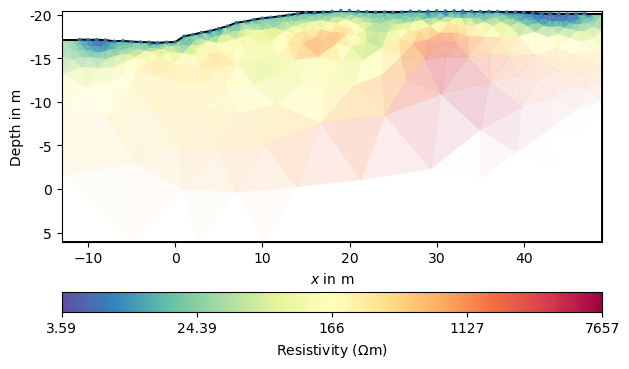

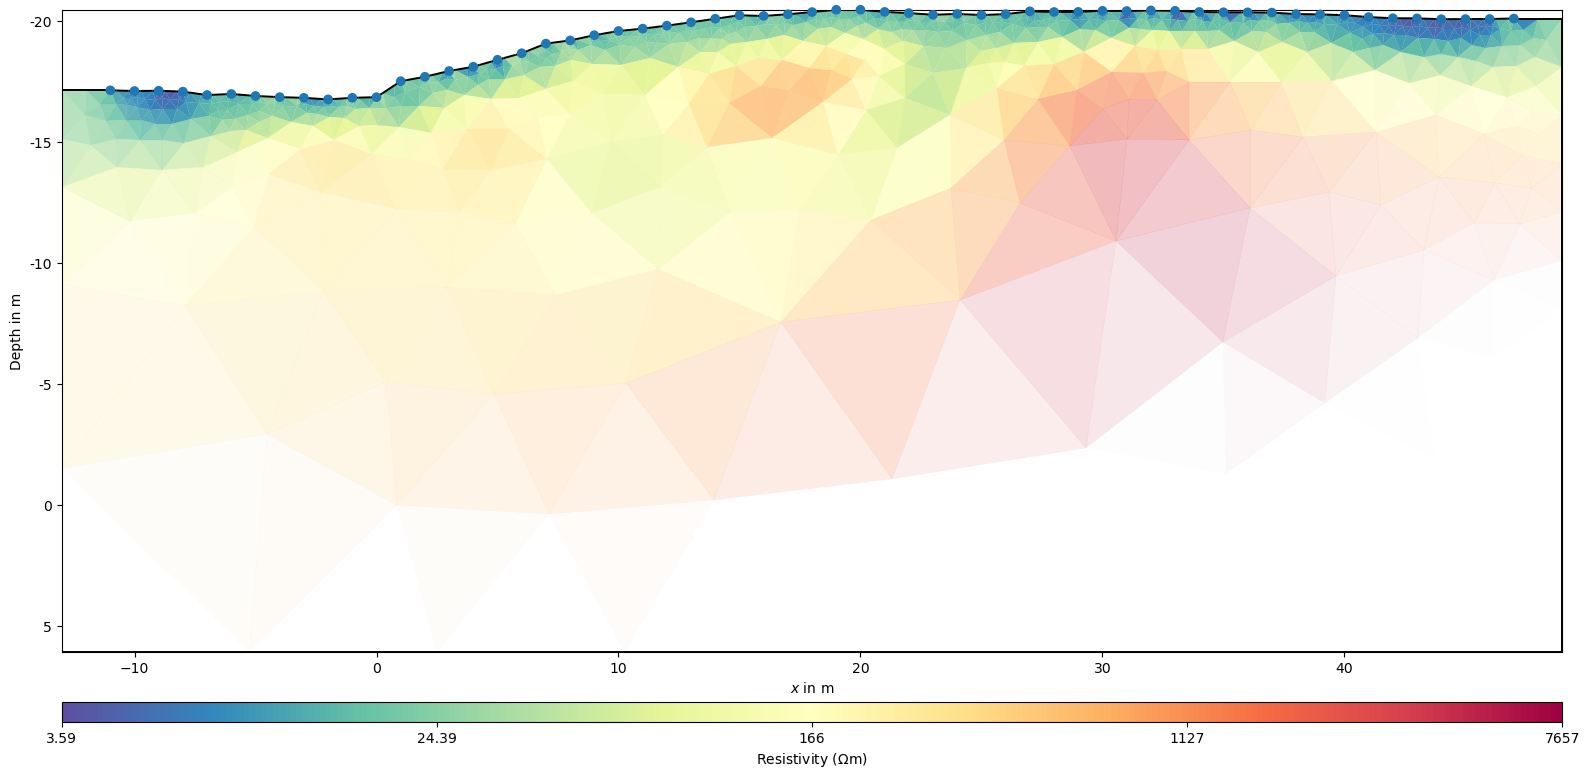

In [79]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/kamik_diag1e_stitched')

24/09/24 - 10:49:54 - pyGIMLi - INFO - Found 2 regions.
24/09/24 - 10:49:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/09/24 - 10:49:54 - pyGIMLi - INFO - Found 2 regions.
24/09/24 - 10:49:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/09/24 - 10:49:54 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/09/24 - 10:49:54 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/09/24 - 10:49:54 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3699 Cells: 6872 Boundaries: 5416
24/09/24 - 10:49:54 - pyGIMLi - INFO - Use median(data values)=102.1165
24/09/24 - 10:49:54 - pyGIMLi - INFO - Created startmodel from forward operator: 1513, min/max=102.116500/102.116500
24/09/24 - 10:49:54 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000018F0DC077E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000018F0E4B9C60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000018F17B56260>
min/max (data): 8.06/463
min/max (error): 3%/3.14%
min/max (start model): 102/102
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  610.47
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  125.92 (dPhi = 79.08%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   58.00 (dPhi = 52.39%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   13.46 (dPhi = 71.46%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    9.84 (dPhi = 24.01%) lam: 20

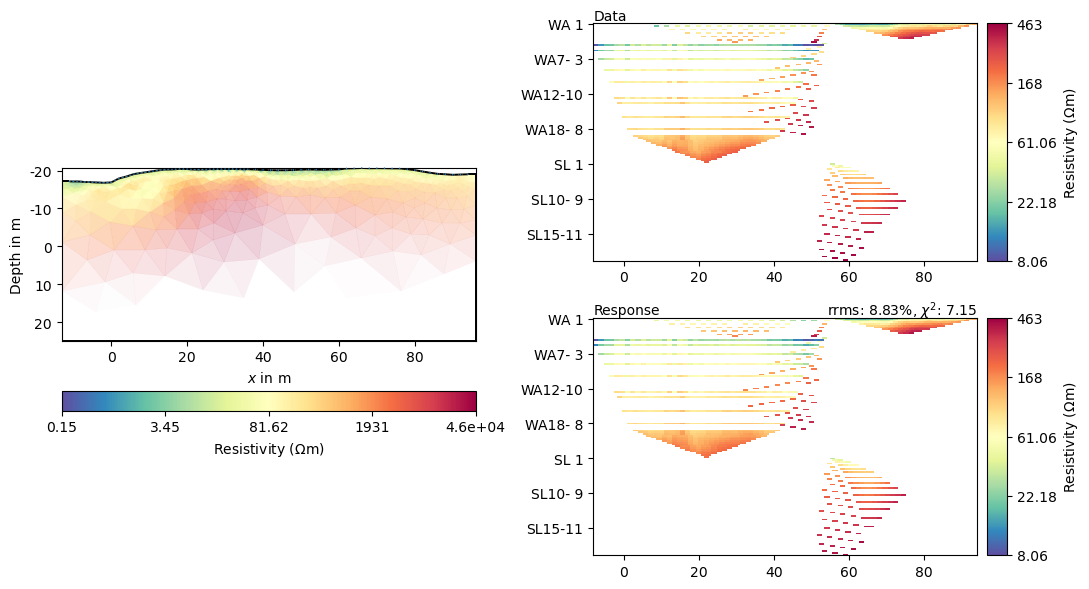

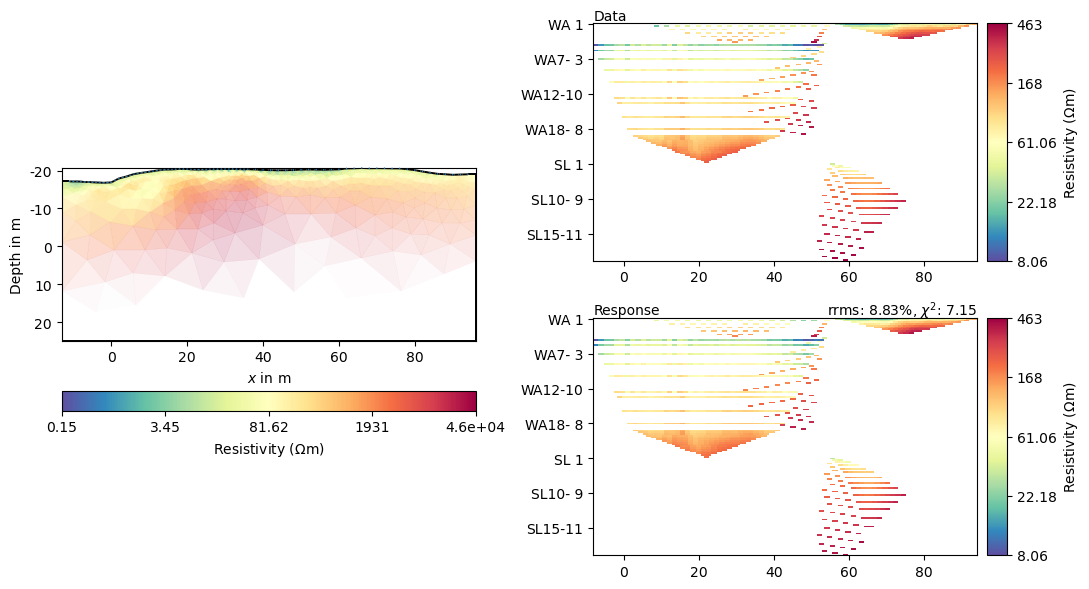

In [102]:
mgr = ert.ERTManager(diag1_extended)
mgr.invert(diag1_extended, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x18f31b12ad0>)

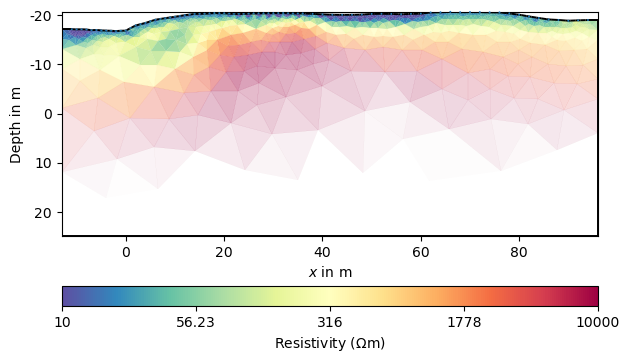

In [115]:
mgr.showResult(cMin=10, cMax=10000, logScale=True)

24/09/24 - 10:59:22 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_diag1_stitched\ERTManager


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_diag1_stitched\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

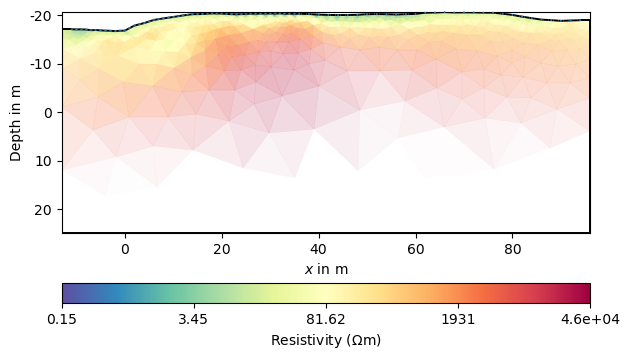

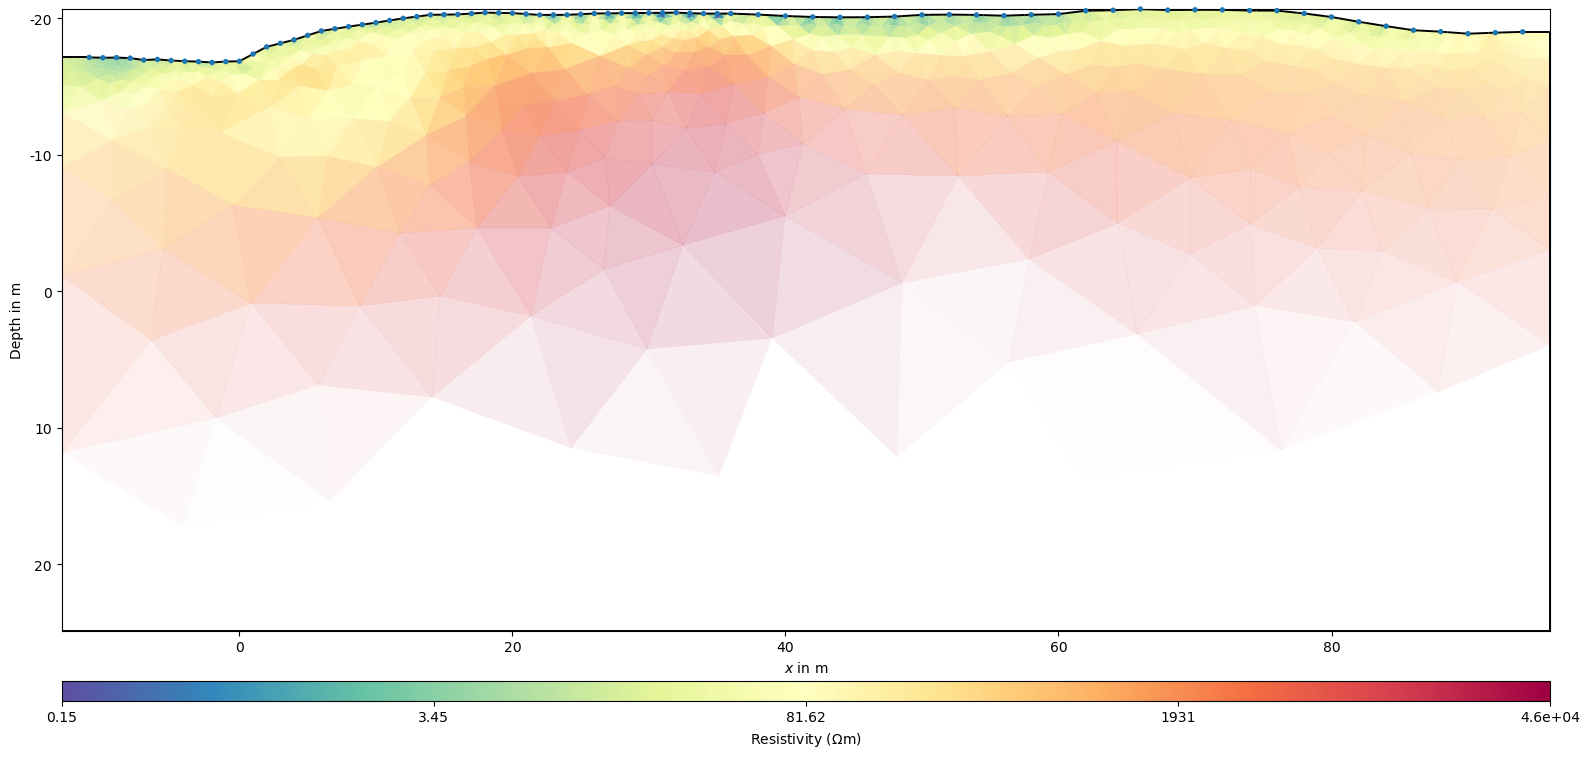

In [116]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/kamik_diag1_stitched')

24/09/24 - 14:10:49 - pyGIMLi - INFO - Found 2 regions.
24/09/24 - 14:10:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/09/24 - 14:10:49 - pyGIMLi - INFO - Found 2 regions.
24/09/24 - 14:10:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/09/24 - 14:10:49 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/09/24 - 14:10:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/09/24 - 14:10:49 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2606 Cells: 4852 Boundaries: 3818
24/09/24 - 14:10:49 - pyGIMLi - INFO - Use median(data values)=448.56
24/09/24 - 14:10:49 - pyGIMLi - INFO - Created startmodel from forward operator: 961, min/max=448.560000/448.560000
24/09/24 - 14:10:49 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000018F8E29FFB0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000018F8E4D8130>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000018F8E4CE8F0>
min/max (data): 22.12/2848
min/max (error): 3%/3.19%
min/max (start model): 449/449
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  902.60
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  122.27 (dPhi = 86.30%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   82.59 (dPhi = 32.07%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   63.17 (dPhi = 23.00%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   50.51 (dPhi = 19.38%) lam: 

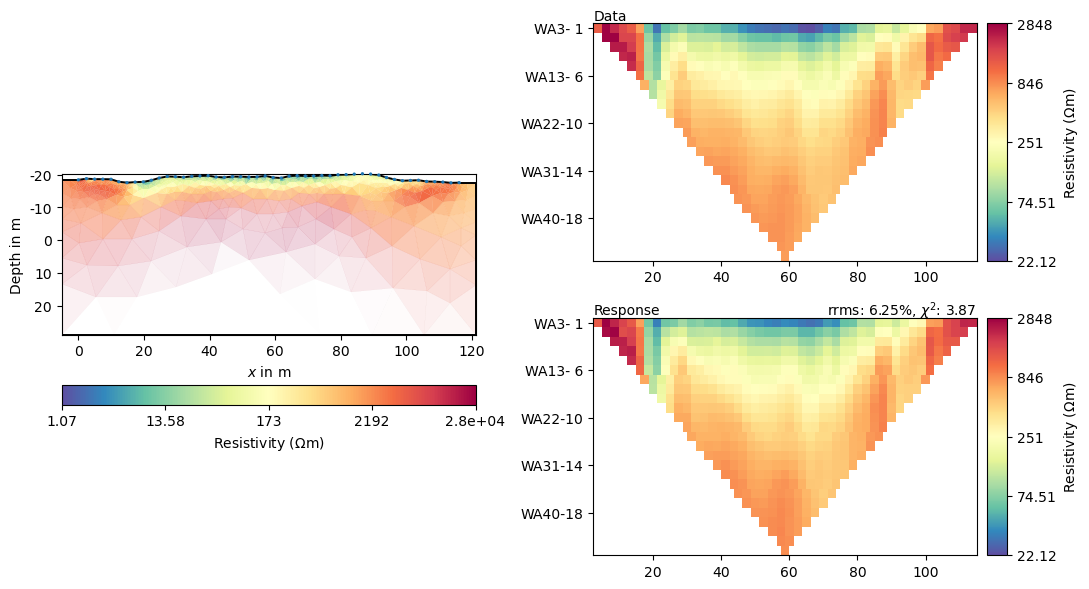

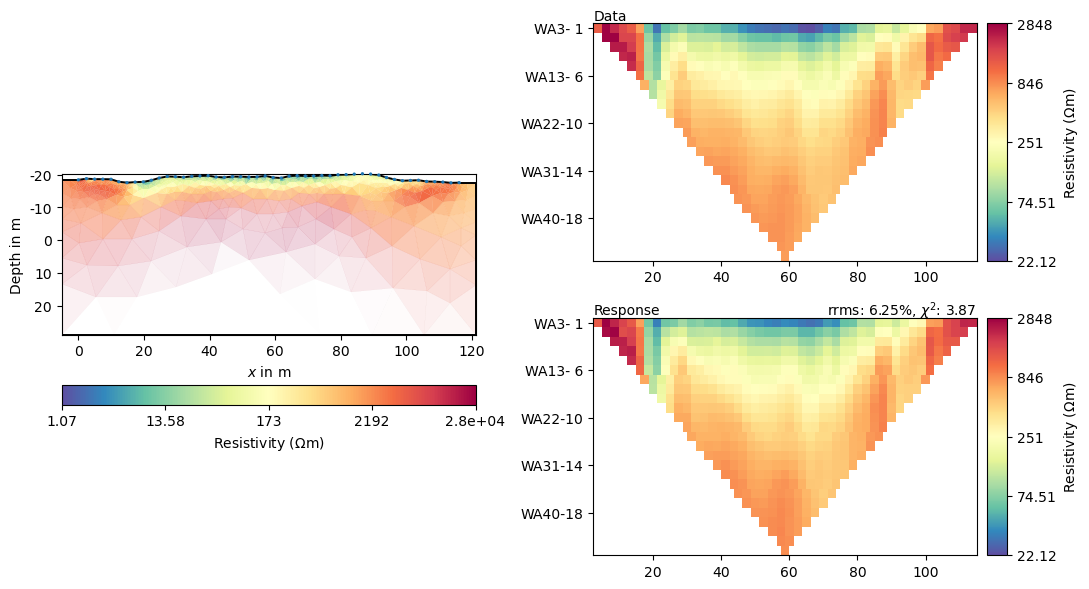

In [200]:
mgr = ert.ERTManager(data2024_long)
mgr.invert(data2024_long, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x18f8ff51790>)

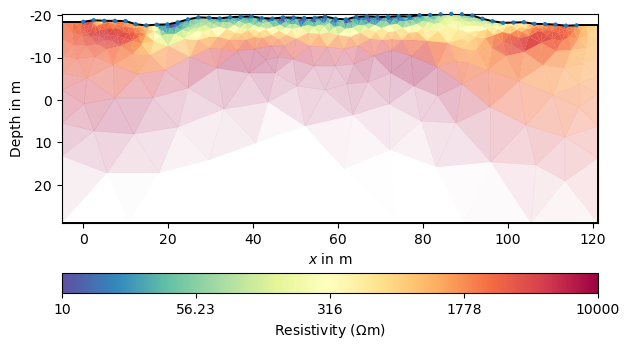

In [201]:
mgr.showResult(cMin=10, cMax=10000, logScale=True)

24/09/24 - 14:11:49 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_june2024_long\ERTManager


Path //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_june2024_long\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_june2024_long\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

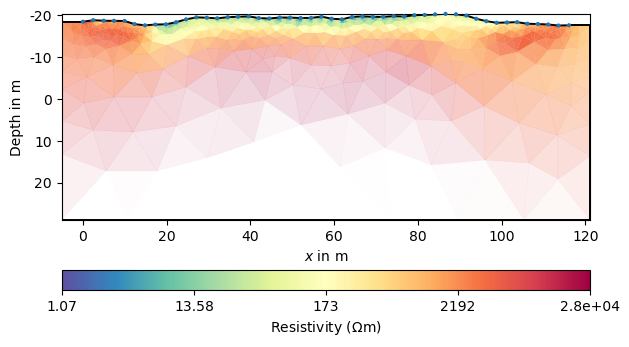

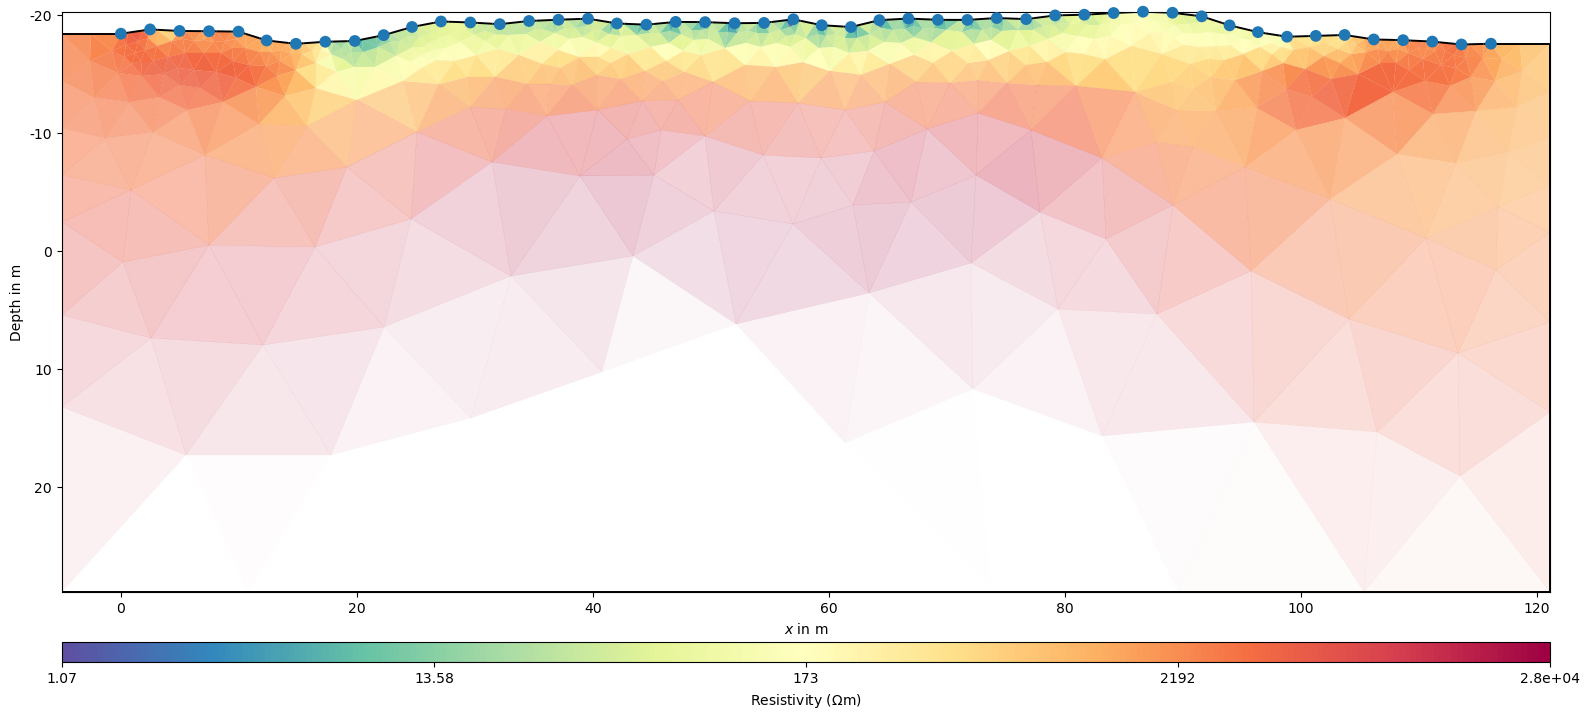

In [202]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/kamik_june2024_long')

27/09/24 - 11:30:43 - pyGIMLi - INFO - Found 2 regions.
27/09/24 - 11:30:43 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
27/09/24 - 11:30:43 - pyGIMLi - INFO - Found 2 regions.
27/09/24 - 11:30:43 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
27/09/24 - 11:30:43 - pyGIMLi - INFO - Creating forward mesh from region infos.
27/09/24 - 11:30:43 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
27/09/24 - 11:30:43 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2615 Cells: 4872 Boundaries: 3832
27/09/24 - 11:30:43 - pyGIMLi - INFO - Use median(data values)=107.647
27/09/24 - 11:30:43 - pyGIMLi - INFO - Created startmodel from forward operator: 1007, min/max=107.647000/107.647000
27/09/24 - 11:30:43 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000018F78AFFFB0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000018F16C3BF10>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000018F7FD4DFC0>
min/max (data): 7.92/347
min/max (error): 3.01%/3.19%
min/max (start model): 108/108
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  692.34
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   60.04 (dPhi = 91.19%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   21.56 (dPhi = 62.46%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    0.81 (dPhi = 89.23%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi²

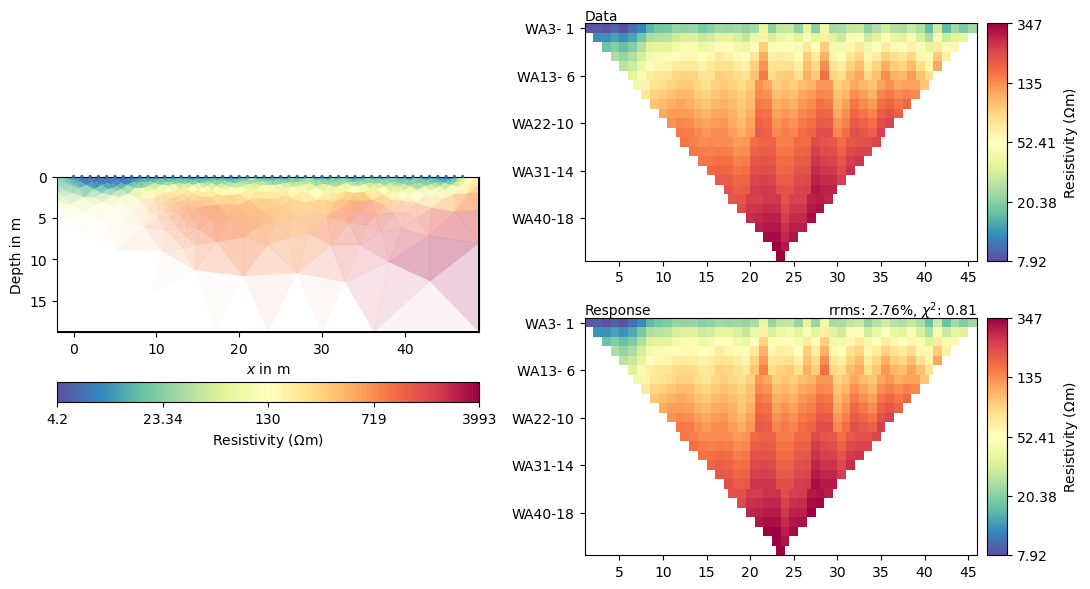

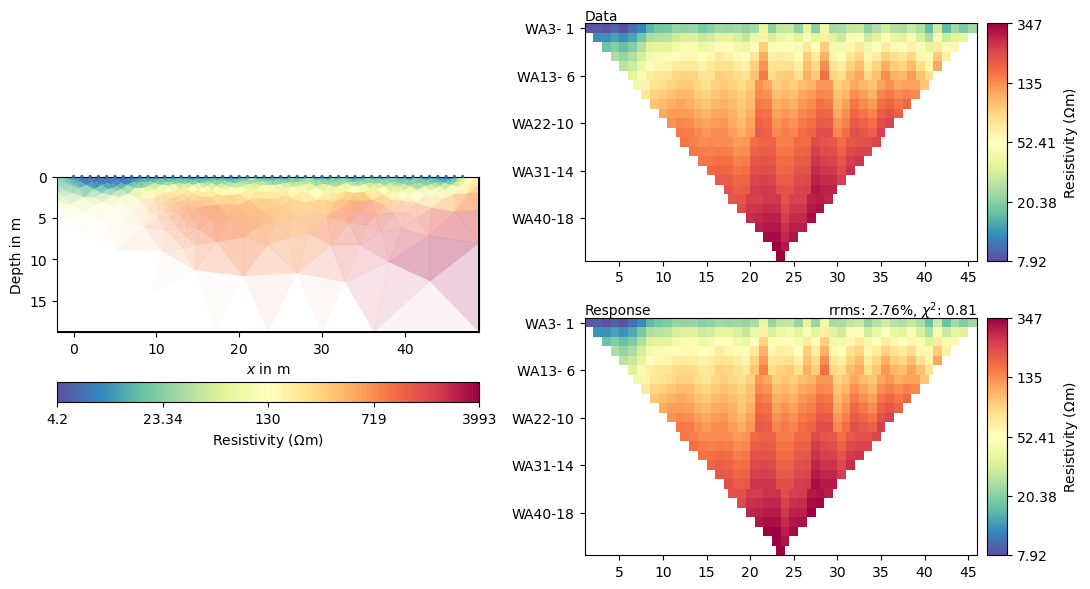

In [251]:
mgr = ert.ERTManager(item)
mgr.invert(kamik[4], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

27/09/24 - 11:31:49 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_veg\ERTManager


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/kamik_veg\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

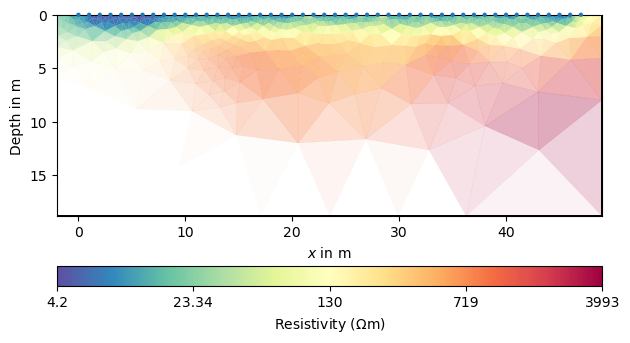

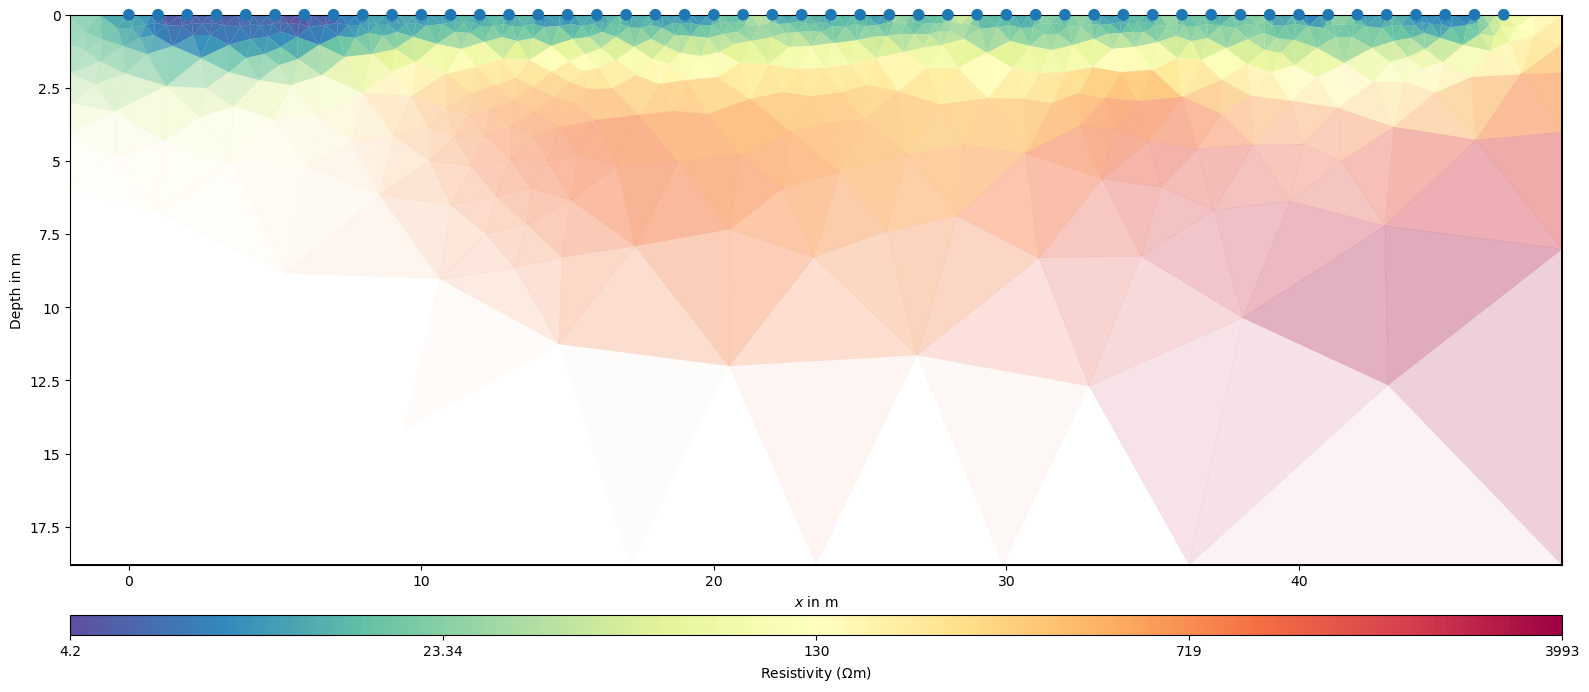

In [252]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/kamik_veg')

In [253]:
mesh_diag1 = pg.load(dir+'all_inversions/kamik_diag1/ERTManager/resistivity-pd.bms')
res_diag1 = pg.load(dir+'all_inversions/kamik_diag1/ERTManager/resistivity.vector')
cov_diag1 = pg.load(dir+'all_inversions/kamik_diag1/ERTManager/resistivity-cov.vector')

mesh_diag1e = pg.load(dir+'all_inversions/kamik_diag1e/ERTManager/resistivity-pd.bms')
res_diag1e = pg.load(dir+'all_inversions/kamik_diag1e/ERTManager/resistivity.vector')
cov_diag1e = pg.load(dir+'all_inversions/kamik_diag1e/ERTManager/resistivity-cov.vector')

mesh_diag1e_shifted = pg.load(dir+'all_inversions/kamik_diag1e_shifted/ERTManager/resistivity-pd.bms')
res_diag1e_shifted = pg.load(dir+'all_inversions/kamik_diag1e_shifted/ERTManager/resistivity.vector')
cov_diag1e_shifted = pg.load(dir+'all_inversions/kamik_diag1e_shifted/ERTManager/resistivity-cov.vector')

mesh_edge = pg.load(dir+'all_inversions/kamik_edge/ERTManager/resistivity-pd.bms')
res_edge = pg.load(dir+'all_inversions/kamik_edge/ERTManager/resistivity.vector')
cov_edge = pg.load(dir+'all_inversions/kamik_edge/ERTManager/resistivity-cov.vector')

mesh_diag1_stitched = pg.load(dir+'all_inversions/kamik_diag1_stitched/ERTManager/resistivity-pd.bms')
res_diag1_stitched = pg.load(dir+'all_inversions/kamik_diag1_stitched/ERTManager/resistivity.vector')
cov_diag1_stitched = pg.load(dir+'all_inversions/kamik_diag1_stitched/ERTManager/resistivity-cov.vector')

mesh_kamik2024august = pg.load(dir+'all_inversions/k38_ws_2024august/ERTManager/resistivity-pd.bms')
res_kamik2024august = pg.load(dir+'all_inversions/k38_ws_2024august/ERTManager/resistivity.vector')
cov_kamik2024august = pg.load(dir+'all_inversions/k38_ws_2024august/ERTManager/resistivity-cov.vector')

mesh_kamik2024june_long = pg.load(dir+'all_inversions/kamik_june2024_long/ERTManager/resistivity-pd.bms')
res_kamik2024june_long = pg.load(dir+'all_inversions/kamik_june2024_long/ERTManager/resistivity.vector')
cov_kamik2024june_long = pg.load(dir+'all_inversions/kamik_june2024_long/ERTManager/resistivity-cov.vector')

mesh_veg = pg.load(dir+'all_inversions/kamik_veg/ERTManager/resistivity-pd.bms')
res_veg = pg.load(dir+'all_inversions/kamik_veg/ERTManager/resistivity.vector')
cov_veg = pg.load(dir+'all_inversions/kamik_veg/ERTManager/resistivity-cov.vector')

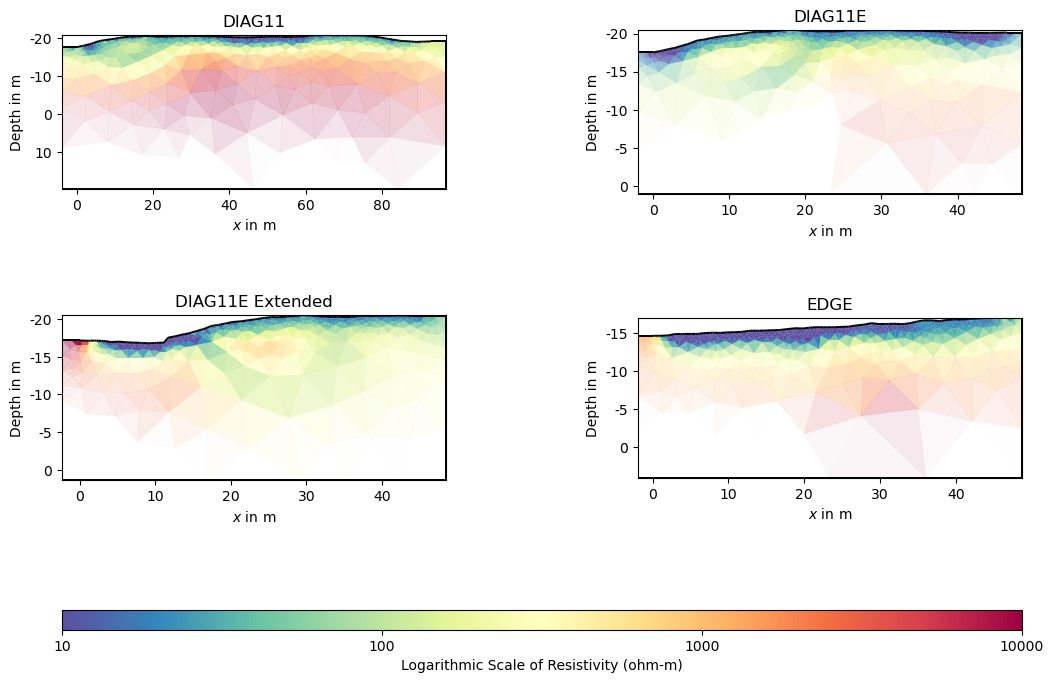

In [118]:
from matplotlib.ticker import LogLocator, LogFormatter



fig, ax = plt.subplots(2, 2, figsize=(12, 10))  
#fig, ax = plt.subplots(1, 2, figsize=(10, 10))

pg.show(mesh_diag1, res_diag1, logScale=True, cMap="Spectral_r", ax=ax[0][0], colorBar=False, cMin=10, cMax=10000, coverage=cov_diag1, sharex=True)
pg.show(mesh_diag1e, res_diag1e, logScale=True, cMap="Spectral_r", ax=ax[0][1], colorBar=False, cMin=10, cMax=10000, coverage=cov_diag1e, sharex=True)
pg.show(mesh_diag1e_shifted, res_diag1e_shifted, logScale=True, cMap="Spectral_r", ax=ax[1][0], colorBar=False, cMin=10, cMax=10000, coverage=cov_diag1e_shifted, sharex=True)
pg.show(mesh_edge, res_edge, logScale=True, cMap="Spectral_r", ax=ax[1][1], colorBar=False, cMin=10, cMax=10000, coverage=cov_edge, sharex=True)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.5) 


cax = fig.add_axes([0.1, 0.15, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=10, cMax=10000, logScale=True, cMap="Spectral_r")

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Logarithmic Scale of Resistivity (ohm-m)', fontsize=10)

ax[0][0].set_title('DIAG11')
ax[0][1].set_title('DIAG11E')
ax[1][0].set_title('DIAG11E Extended')
ax[1][1].set_title('EDGE')

#ax[1][0].invert_xaxis()



plt.show()

First subplot x-axis range: (-13.000783846396207, 96.0007838463962)
First subplot y-axis range: (-24.856, 20.682)
Second subplot x-axis range: (-5.0, 121.11103028994656)
Second subplot y-axis range: (-28.878636795164248, 20.27870160686314)


C:\Users\mealiy001\AppData\Local\Temp\ipykernel_3488\213284075.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_3488\213284075.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])


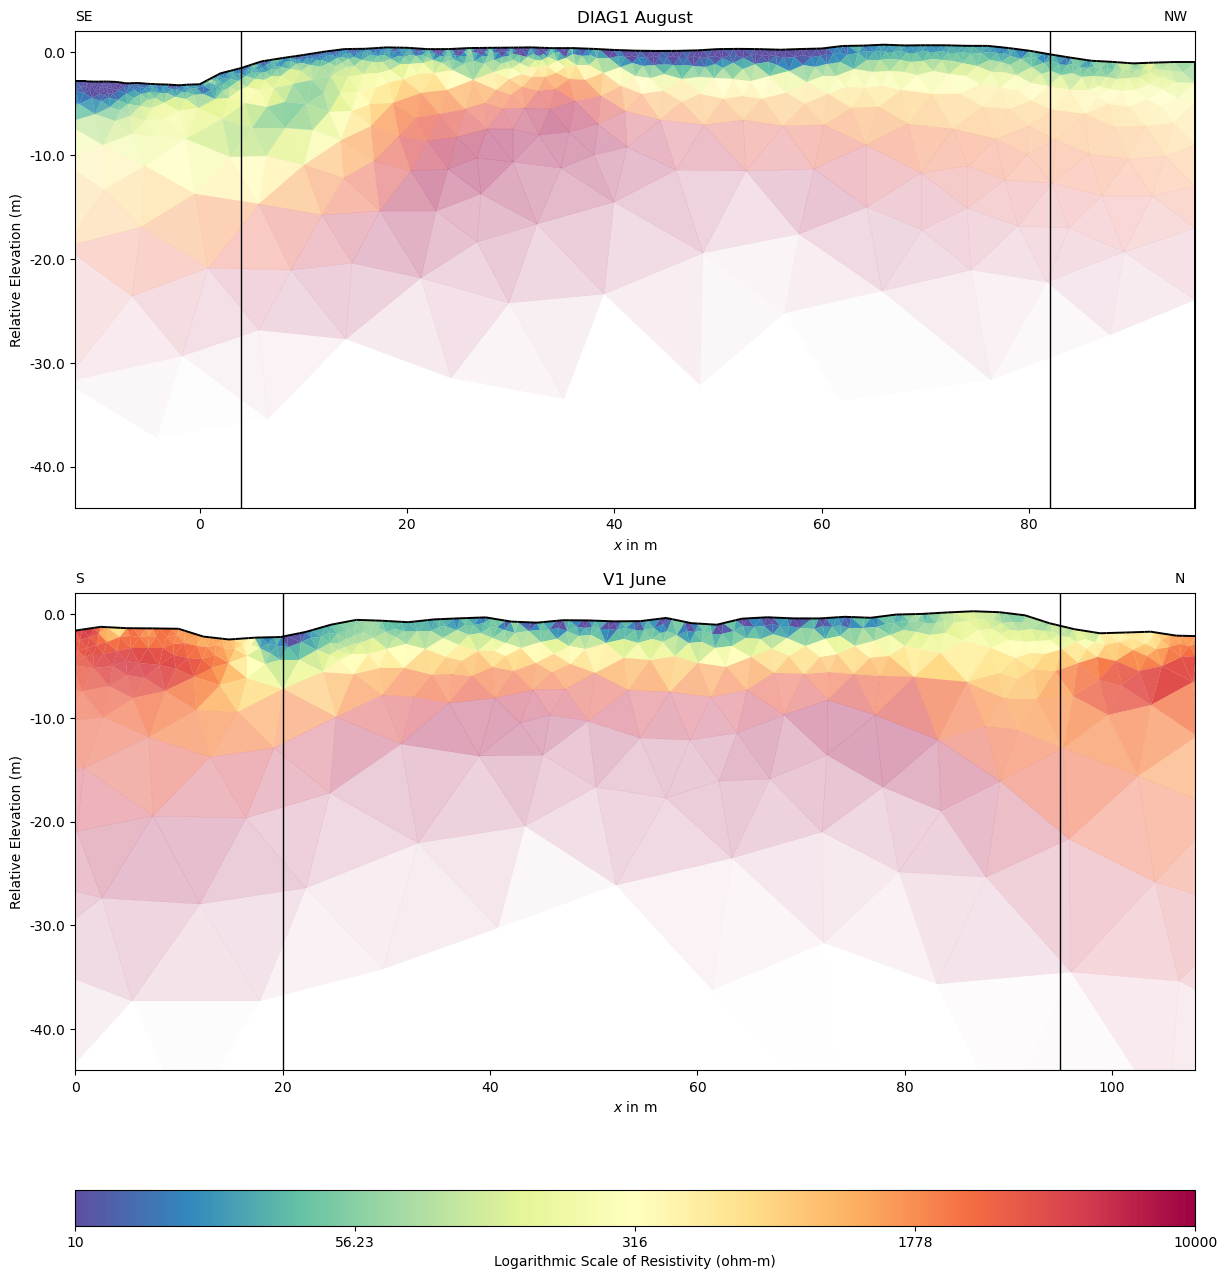

In [247]:
from matplotlib.ticker import LogLocator, LogFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig, ax = plt.subplots(2, 1, figsize=(14, 18))  
#fig, ax = plt.subplots(1, 2, figsize=(10, 10))

#pg.show(mesh_kamik2024august, res_kamik2024august, logScale=True, cMap="Spectral_r", ax=ax[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2024august, sharex=True)
pg.show(mesh_diag1_stitched, res_diag1_stitched, logScale=True, cMap="Spectral_r", ax=ax[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_diag1_stitched, sharex=True)
pg.show(mesh_kamik2024june_long, res_kamik2024june_long, logScale=True, cMap="Spectral_r", ax=ax[1], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2024june_long, sharex=True)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.5) 


cax = fig.add_axes([0.1, 0.15, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=10, cMax=10000, logScale=True, cMap="Spectral_r")


cax.set_xlabel('Logarithmic Scale of Resistivity (ohm-m)', fontsize=10)

ax[0].set_title('DIAG1 August')
ax[1].set_title('V1 June')

xlim0 = ax[0].get_xlim()  # Get x-axis limits of the first subplot
ylim0 = ax[0].get_ylim()  # Get y-axis limits of the first subplot

xlim1 = ax[1].get_xlim()  # Get x-axis limits of the second subplot
ylim1 = ax[1].get_ylim()  # Get y-axis limits of the second subplot

# Print the results
print("First subplot x-axis range:", xlim0)
print("First subplot y-axis range:", ylim0)
print("Second subplot x-axis range:", xlim1)
print("Second subplot y-axis range:", ylim1)

ax[0].set_xlim(-12, 96)  # Get x-axis limits of the first subplot
ax[0].set_ylim(-24, 22)  # Get y-axis limits of the first subplot

ax[1].set_xlim(0, 108)  # Get x-axis limits of the second subplot
ax[1].set_ylim(-24, 22)  # Get y-axis limits of the second subplot

current_ticks = ax[0].get_yticks()
relative_ticks = current_ticks - 20  # Assuming 17 is the minimum elevation

# Set the new tick labels to show relative elevation
for i in range(len(kamik)-2):
    ax[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
    ax[i].set_ylabel("Relative Elevation (m)")

ax[0].text(-12, 23, 'SE')
ax[0].text(93, 23, 'NW')
ax[1].text(0, 23, 'S')
ax[1].text(106, 23, 'N')

ax[0].axvline(4, linewidth=1, color='black', label='sump edge')
ax[0].axvline(82, linewidth=1, color='black')
ax[1].axvline(20, linewidth=1, color='black')
ax[1].axvline(95, linewidth=1, color='black')



Text(48, 1, 'E')

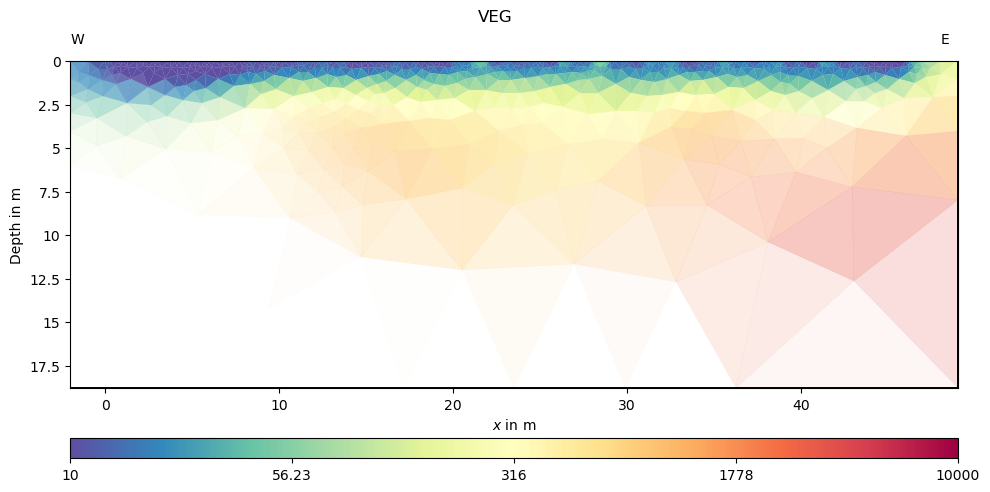

In [259]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('VEG')
ax = fig.add_subplot()
pg.show(mesh_veg, res_veg, logScale=True, cMap="Spectral_r", ax=ax, colorBar=True, cMin=10, cMax=10000, coverage=cov_veg, sharex=True)


ax.text(-2, 1, 'W')
ax.text(48, 1, 'E')

